## Import Libraries

In [224]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

## Read data file as dataframe

In [225]:
#train=pd.read_csv('C:\\Users\\Iqraa\\Desktop\\CAPSTONE PROJECT 8\\train.csv')
train=pd.read_csv('Capston_train.csv')
train.head()

Unnamed: 0      ID     Salary               DOJ               DOL  \
0      train  203097   420000.0  01-06-2012 00:00           present   
1      train  579905   500000.0  01-09-2013 00:00           present   
2      train  810601   325000.0  01-06-2014 00:00           present   
3      train  267447  1100000.0  01-07-2011 00:00           present   
4      train  343523   200000.0  01-03-2014 00:00  01-03-2015 00:00   

                Designation    JobCity Gender               DOB  10percentage  \
0   senior quality engineer  Bangalore      f  19-02-1990 00:00          84.3   
1         assistant manager     Indore      m  04-10-1989 00:00          85.4   
2          systems engineer    Chennai      f  03-08-1992 00:00          85.0   
3  senior software engineer    Gurgaon      m  05-12-1989 00:00          85.6   
4                       get    Manesar      m  27-02-1991 00:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

## Shape

In [226]:
train.shape

(3998, 39)

## Data Types

In [227]:
train.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

## Data Pre-Processing

### Uni-Variate and Bi-Variate Analysis

In [228]:
train.iloc[1,3]

'01-09-2013 00:00'

In [229]:
train['JobCity']=train['JobCity'].str.replace('-1','Others')

In [230]:
train['DOL']=train['DOL'].str.replace('present','01-12-2015 00:00')

In [231]:
train.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

In [232]:
train['DOL'] = pd.to_datetime(train['DOL'])
train['DOJ'] = pd.to_datetime(train['DOJ'])
train['DOB'] = pd.to_datetime(train['DOB'])
train['EXP']=train['DOL']-train['DOJ']

In [233]:
train['Age']=train['DOL']-train['DOB']
train['Age']=train['Age'].astype(str)

In [234]:
train['Experience']=((train['DOL']-train['DOJ']).map(lambda x: round(x.days/365,1)))

In [235]:
train.loc[train['collegeGPA']<=10,'collegeGPA']*=9.5

In [236]:
train['Age']=((train['DOL']-train['DOB']).map(lambda x: round(x.days/365)))

In [237]:
train['Age']=train['Age'].astype(int)
train['Experience']=train['Experience'].astype(int)

In [238]:
train.JobCity = train.JobCity.str.replace('banglore','bangalore')
train.JobCity = train.JobCity.str.replace('delhi','new delhi')
train.JobCity = train.JobCity.str.replace('new dehli','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi/ncr','new delhi')
train.JobCity = train.JobCity.str.replace('ncr','new delhi')
train.JobCity = train.JobCity.str.replace('navi mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai , hyderabad','mumbai')
train.JobCity = train.JobCity.str.replace('new new delhi','new delhi')
train.JobCity = train.JobCity.str.replace('asifabadbangalore','bangalore')
train.JobCity = train.JobCity.str.replace('bengaluru','bangalore')
train.JobCity = train.JobCity.str.replace('greater noida','noida')
train.JobCity = train.JobCity.str.replace('nouda','noida')
train.JobCity = train.JobCity.str.replace('banagalore','bangalore')
train.JobCity = train.JobCity.str.replace('banaglore','bangalore')
train.JobCity = train.JobCity.str.replace('a-64,sec-64,noida','noida')
train.JobCity = train.JobCity.str.replace('technopark, trivandrum','trivandrum')
train.JobCity = train.JobCity.str.replace('vizag','visakhapatnam')
train.JobCity = train.JobCity.str.replace('vsakhapttnam','visakhapatnam')
train.JobCity = train.JobCity.str.replace('thiruvananthapuram','trivandrum')
train.JobCity = train.JobCity.str.replace('ambala city','ambala')
train.JobCity = train.JobCity.str.replace('kudankulam ,tarapur','kundankulam')
train.JobCity = train.JobCity.str.replace('gaziabaad','ghaziabad')
train.JobCity = train.JobCity.str.replace('gajiabaad','ghaziabad')
train.JobCity = train.JobCity.str.replace('bhubaneswar','bhubaneshwar')
train.JobCity = train.JobCity.str.replace('bhubneshwar','bhubaneshwar')
train.JobCity = train.JobCity.str.replace('guragaon','gurgaon')
train.JobCity = train.JobCity.str.replace('gurgoan','gurgaon')
train.JobCity = train.JobCity.str.replace('kolkata`','kolkata')
train.JobCity = train.JobCity.str.replace('sonepat','sonipat')
train.JobCity = train.JobCity.str.replace('baroda','vadodara')
train.JobCity = train.JobCity.str.replace('hderabad','hyderabad')
train.JobCity = train.JobCity.str.replace('pondi','pondy')
train.JobCity = train.JobCity.str.replace('punchkula','panchkula')
train.JobCity = train.JobCity.str.replace('muzzafarpur','muzaffarpur')
train.JobCity = train.JobCity.str.replace('kochi/cochin, chennai and coimbatore','kochi/cochin')
train.JobCity = train.JobCity.str.replace('nasikcity','nashik')
train.JobCity = train.JobCity.str.replace('sahibabad','shahibabad')
train.JobCity = train.JobCity.str.replace('punr','pune')
train.JobCity = train.JobCity.str.replace('tirupati','tirupathi')
train.JobCity = train.JobCity.str.replace('sadulpur,rajgarh,distt-churu,rajasthan','sadulpur')

train.JobCity = train.JobCity.str.replace('bangalore','bangalore')
train.JobCity = train.JobCity.str.replace('BAngalore','bangalore')
train.JobCity = train.JobCity.str.replace('Banglore','bangalore')
train.JobCity = train.JobCity.str.replace('BANGLORE','bangalore')
train.JobCity = train.JobCity.str.replace(' bangalore','bangalore')
train.JobCity = train.JobCity.str.replace('bangalore','bangalore')
train.JobCity = train.JobCity.str.replace('banagalore','bangalore')
train.JobCity = train.JobCity.str.replace('banaglore','bangalore')
train.JobCity = train.JobCity.str.replace('bangalore ','bangalore')
train.JobCity = train.JobCity.str.replace('BANGALORE','bangalore')
train.JobCity = train.JobCity.str.replace('Banagalore','bangalore')
train.JobCity = train.JobCity.str.replace( 'Bengaluru','bangalore') 
train.JobCity = train.JobCity.str.replace(  'Chennai, bangalore','bangalore')
train.JobCity = train.JobCity.str.replace(  'bangalore ','bangalore')
train.JobCity = train.JobCity.str.replace(  'Asifabadbangalore','bangalore')
train.JobCity = train.JobCity.str.replace(  'banaglore'  ,'bangalore')
train.JobCity = train.JobCity.str.replace('chennai,bangalore','bangalore')

train.JobCity = train.JobCity.str.replace( ' chennai'  ,'chennai')
train.JobCity = train.JobCity.str.replace(  'kochi/cochin,chennai and coimbatore' ,'chennai')
train.JobCity = train.JobCity.str.replace( 'chennai '  ,'chennai')
train.JobCity = train.JobCity.str.replace(  'chennai & mumbai' ,'chennai')
train.JobCity = train.JobCity.str.replace(  'chennai& mumbai' ,'chennai')

train.JobCity=train.JobCity.str.replace('Navi Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai , hyderabad','mumbai')
train.JobCity = train.JobCity.str.replace('THANE','mumbai')
train.JobCity = train.JobCity.str.replace('Thane','mumbai')
train.JobCity = train.JobCity.str.replace('Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('MUMBAI','mumbai')
train.JobCity = train.JobCity.str.replace(' mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('NAVI MUMBAI','mumbai')
train.JobCity = train.JobCity.str.replace('Navi Mumbai , Hyderabad','mumbai')
train.JobCity = train.JobCity.str.replace('thane','mumbai')
train.JobCity = train.JobCity.str.replace('Khopoli','mumbai')
train.JobCity = train.JobCity.str.replace('Navi mumbai','mumbai')
train.JobCity = train.JobCity.str.replace(' Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace(' Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai ','mumbai')
train.JobCity = train.JobCity.str.replace('Navimumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai , Hyderabad','mumbai')

train.JobCity = train.JobCity.str.replace('hyderabad(bhadurpally)','hyderabad')
train.JobCity = train.JobCity.str.replace('hderabad','hyderabad')
train.JobCity = train.JobCity.str.replace('Hyderabad ','hyderabad')
train.JobCity = train.JobCity.str.replace( 'navi mumbai , hyderabad','hyderabad')
train.JobCity = train.JobCity.str.replace('hyderabad ' ,'hyderabad')
train.JobCity = train.JobCity.str.replace('delhi','new delhi')
train.JobCity = train.JobCity.str.replace('new dehli','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi/ncr','new delhi')
train.JobCity = train.JobCity.str.replace('ncr','new delhi')
train.JobCity = train.JobCity.str.replace('new new delhi','new delhi')
train.JobCity = train.JobCity.str.replace('greater noida','new delhi')
train.JobCity = train.JobCity.str.replace('nouda','new delhi')
train.JobCity = train.JobCity.str.replace('a-64,sec-64,noida','new delhi')
train.JobCity = train.JobCity.str.replace('noida','new delhi')
train.JobCity = train.JobCity.str.replace('noida','new delhi')
train.JobCity = train.JobCity.str.replace('gaziabaad','new delhi')
train.JobCity = train.JobCity.str.replace('gajiabaad','new delhi')
train.JobCity = train.JobCity.str.replace('ghaziabad','new delhi')
train.JobCity = train.JobCity.str.replace('guragaon','new delhi')
train.JobCity = train.JobCity.str.replace('gurgoan','new delhi')
train.JobCity = train.JobCity.str.replace('gurgaon','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi - jaisalmer','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi ','new delhi')
train.JobCity = train.JobCity.str.replace(' new delhi','new delhi')

train.JobCity = train.JobCity.str.replace('kolkata ','kolkata')
train.JobCity = train.JobCity.str.replace('maharajganj','north zone')

train.JobCity = train.JobCity.str.replace( 'rewari','north zone')
train.JobCity = train.JobCity.str.replace('panchkula','north zone')
train.JobCity = train.JobCity.str.replace('lucknow','north zone')
train.JobCity = train.JobCity.str.replace('una','north zone')
train.JobCity = train.JobCity.str.replace('kanpur ','north zone')
train.JobCity = train.JobCity.str.replace('faridabad','north zone')
train.JobCity = train.JobCity.str.replace('haridwar','north zone')
train.JobCity = train.JobCity.str.replace( 'unnao','north zone')
train.JobCity = train.JobCity.str.replace('dehradun','north zone')
train.JobCity = train.JobCity.str.replace('rudrapur','north zone')
train.JobCity = train.JobCity.str.replace('dharamshala','north zone')
train.JobCity = train.JobCity.str.replace('hissar','north zone')
train.JobCity = train.JobCity.str.replace('gurga','north zone')
train.JobCity = train.JobCity.str.replace('chandigarh','north zone')
train.JobCity = train.JobCity.str.replace('pantnagar','north zone')
train.JobCity = train.JobCity.str.replace( 'lucknow ','north zone')
train.JobCity = train.JobCity.str.replace('ludhiana','north zone')
train.JobCity = train.JobCity.str.replace( 'muzaffarnagar','north zone')
train.JobCity = train.JobCity.str.replace('gagret','north zone')
train.JobCity = train.JobCity.str.replace('indirapuram,new delhi','north zone')
train.JobCity = train.JobCity.str.replace('bareli','north zone')
train.JobCity = train.JobCity.str.replace('kanpur','north zone')
train.JobCity = train.JobCity.str.replace('dharuhera','north zone')
train.JobCity = train.JobCity.str.replace('meerut','north zone')
train.JobCity = train.JobCity.str.replace('agra','north zone')
train.JobCity = train.JobCity.str.replace('rohtak','north zone')
train.JobCity = train.JobCity.str.replace('jaspur','north zone')
train.JobCity = train.JobCity.str.replace('shimla','north zone')
train.JobCity = train.JobCity.str.replace('jammu','north zone')
train.JobCity = train.JobCity.str.replace( 'jhajjar','north zone')
train.JobCity = train.JobCity.str.replace('nalagarh','north zone')
train.JobCity = train.JobCity.str.replace( 'chandigarh ','north zone')
train.JobCity = train.JobCity.str.replace('joshimath','north zone')
train.JobCity = train.JobCity.str.replace('bathinda','north zone')
train.JobCity = train.JobCity.str.replace('kala amb ','north zone')
train.JobCity = train.JobCity.str.replace('karnal','north zone')
train.JobCity = train.JobCity.str.replace('baddi hp','north zone')
train.JobCity = train.JobCity.str.replace('bahadurgarh','north zone')
train.JobCity = train.JobCity.str.replace('varanasi','north zone')
train.JobCity = train.JobCity.str.replace( 'shahibabad','north zone')
train.JobCity = train.JobCity.str.replace('ambala','north zone')
train.JobCity = train.JobCity.str.replace( 'roorkee','north zone')
train.JobCity = train.JobCity.str.replace('allahabad','north zone')
train.JobCity = train.JobCity.str.replace('panchkula ','north zone')
train.JobCity = train.JobCity.str.replace('jalandhar','north zone')
train.JobCity = train.JobCity.str.replace('phagwara','north zone')
train.JobCity = train.JobCity.str.replace('yamuna nagar','north zone')
train.JobCity = train.JobCity.str.replace('sampla','north zone')
train.JobCity = train.JobCity.str.replace('mainpuri','north zone')
train.JobCity = train.JobCity.str.replace('rae bareli','north zone')
train.JobCity = train.JobCity.str.replace( 'patiala','north zone')
train.JobCity = train.JobCity.str.replace('gorakhpur','north zone')
train.JobCity = train.JobCity.str.replace( 'rajpura','north zone')
train.JobCity = train.JobCity.str.replace( 'haryana','north zone')
train.JobCity = train.JobCity.str.replace( 'haryana','north zone')

train.JobCity = train.JobCity.str.replace('kolkata ','kolkata')
train.JobCity = train.JobCity.str.replace('bhubaneshwar','east zone')
train.JobCity = train.JobCity.str.replace('dhanbad','east zone')
train.JobCity = train.JobCity.str.replace('bhagalpur','east zone')
train.JobCity = train.JobCity.str.replace('bankura','east zone')
train.JobCity = train.JobCity.str.replace('siliguri ','east zone')
train.JobCity = train.JobCity.str.replace('jamshedpur','east zone')
train.JobCity = train.JobCity.str.replace('ranchi','east zone')
train.JobCity = train.JobCity.str.replace('siliguri','east zone')
train.JobCity = train.JobCity.str.replace('angul','east zone')
train.JobCity = train.JobCity.str.replace('jowai','east zone')
train.JobCity = train.JobCity.str.replace('siliguri ','east zone')
train.JobCity = train.JobCity.str.replace('ganjam','east zone')
train.JobCity = train.JobCity.str.replace('chandrapur','east zone')
train.JobCity = train.JobCity.str.replace('patna','east zone')
train.JobCity = train.JobCity.str.replace('jaspur','east zone')
train.JobCity = train.JobCity.str.replace('burdwan','east zone')
train.JobCity = train.JobCity.str.replace('east zone ','east zone')
train.JobCity = train.JobCity.str.replace('nagari','east zone')
train.JobCity = train.JobCity.str.replace('orissa','east zone')
train.JobCity = train.JobCity.str.replace('durgapur','east zone')
train.JobCity = train.JobCity.str.replace('rayagada, odisha','east zone')
train.JobCity = train.JobCity.str.replace('howrah','east zone')
train.JobCity = train.JobCity.str.replace('bihar','east zone')
train.JobCity = train.JobCity.str.replace('baripada','east zone')
train.JobCity = train.JobCity.str.replace('guwahati','east zone')
train.JobCity = train.JobCity.str.replace('rourkela','east zone')
train.JobCity = train.JobCity.str.replace('haldia','east zone')

train.JobCity = train.JobCity.str.replace('mangalore','south zone')
train.JobCity = train.JobCity.str.replace('mysore','south zone')
train.JobCity = train.JobCity.str.replace('trivandrum' ,'south zone')
train.JobCity = train.JobCity.str.replace('coimbatore' ,'south zone')
train.JobCity = train.JobCity.str.replace('visakhapatnam','south zone')
train.JobCity = train.JobCity.str.replace('kochi/cochin','south zone')
train.JobCity = train.JobCity.str.replace('mysore ','south zone')
train.JobCity = train.JobCity.str.replace('kochi','south zone')
train.JobCity = train.JobCity.str.replace('tirupathi' ,'south zone')
train.JobCity = train.JobCity.str.replace('tirunelvelli' ,'south zone')
train.JobCity = train.JobCity.str.replace('tornagallu' ,'south zone')
train.JobCity = train.JobCity.str.replace('madurai' ,'south zone')
train.JobCity = train.JobCity.str.replace('cheyyar','south zone')
train.JobCity = train.JobCity.str.replace(' ariyalur' ,'south zone')
train.JobCity = train.JobCity.str.replace('calicut','south zone')
train.JobCity = train.JobCity.str.replace('miryalaguda','south zone')
train.JobCity = train.JobCity.str.replace('trichy','south zone')
train.JobCity = train.JobCity.str.replace('kundankulam','south zone')
train.JobCity = train.JobCity.str.replace('ongole','south zone')
train.JobCity = train.JobCity.str.replace('ernakulam','south zone')
train.JobCity = train.JobCity.str.replace('muvattupuzha','south zone')
train.JobCity = train.JobCity.str.replace('orissa','south zone')
train.JobCity = train.JobCity.str.replace('mettur, tamil nadu ','south zone')
train.JobCity = train.JobCity.str.replace('kurnool','south zone')
train.JobCity = train.JobCity.str.replace('rayagada, odisha','south zone')
train.JobCity = train.JobCity.str.replace('nellore','south zone')
train.JobCity = train.JobCity.str.replace('vellore','south zone')
train.JobCity = train.JobCity.str.replace('pondycherry','south zone')
train.JobCity = train.JobCity.str.replace('secunderabad','south zone')
train.JobCity = train.JobCity.str.replace('gorakhpur','south zone')
train.JobCity = train.JobCity.str.replace('gorakhpur','south zone')
train.JobCity = train.JobCity.str.replace('hubli','south zone')
train.JobCity = train.JobCity.str.replace('kakinada','south zone')
train.JobCity = train.JobCity.str.replace('gulbarga','south zone')
train.JobCity = train.JobCity.str.replace('pondy','south zone')
train.JobCity = train.JobCity.str.replace('keral','south zone')
train.JobCity = train.JobCity.str.replace('bellary','south zone')
train.JobCity = train.JobCity.str.replace('hospete','south zone')
train.JobCity = train.JobCity.str.replace('vandavasi','south zone')
train.JobCity = train.JobCity.str.replace('salem','south zone')
train.JobCity = train.JobCity.str.replace('dharmapuri','south zone')
train.JobCity = train.JobCity.str.replace('belgaum','south zone')
train.JobCity = train.JobCity.str.replace('nagari','south zone')
train.JobCity = train.JobCity.str.replace('trichur','south zone')

train.JobCity = train.JobCity.str.replace('indore','Central Zone')
train.JobCity = train.JobCity.str.replace('bhopal','Central Zone')
train.JobCity = train.JobCity.str.replace('raigarh','Central Zone')
train.JobCity = train.JobCity.str.replace('jabalpur','Central Zone')
train.JobCity = train.JobCity.str.replace('jagdalpur','Central Zone')
train.JobCity = train.JobCity.str.replace('gwalior','Central Zone')
train.JobCity = train.JobCity.str.replace('bareli','Central Zone')
train.JobCity = train.JobCity.str.replace('bilaspur','Central Zone')
train.JobCity = train.JobCity.str.replace('shahdol','Central Zone')
train.JobCity = train.JobCity.str.replace('bhopal ','Central Zone')
train.JobCity = train.JobCity.str.replace('bhilai','Central Zone')
train.JobCity = train.JobCity.str.replace('singaruli','Central Zone')

train.JobCity = train.JobCity.str.replace('Jaipur','West Zone')
train.JobCity = train.JobCity.str.replace('jaipur','West Zone')
train.JobCity = train.JobCity.str.replace('ahmedabad','West Zone')
train.JobCity = train.JobCity.str.replace('nagpur','West Zone')
train.JobCity = train.JobCity.str.replace('nashik','West Zone')
train.JobCity = train.JobCity.str.replace('kolhapur','West Zone')
train.JobCity = train.JobCity.str.replace('rajasthan','West Zone')
train.JobCity = train.JobCity.str.replace('bhiwadi','West Zone')
train.JobCity = train.JobCity.str.replace('rajkot','West Zone')
train.JobCity = train.JobCity.str.replace('daman and diu','West Zone')
train.JobCity = train.JobCity.str.replace('gandhi nagar','West Zone')
train.JobCity = train.JobCity.str.replace('beawar','West Zone')
train.JobCity = train.JobCity.str.replace('alwar','West Zone')
train.JobCity = train.JobCity.str.replace('jodhpur','West Zone')
train.JobCity = train.JobCity.str.replace('udaipur','West Zone')
train.JobCity = train.JobCity.str.replace('aurangabad','West Zone')
train.JobCity = train.JobCity.str.replace('neemrana','West Zone')
train.JobCity = train.JobCity.str.replace('ahmednagar','West Zone')
train.JobCity = train.JobCity.str.replace('gandhinagar','West Zone')
train.JobCity = train.JobCity.str.replace('sadulpur','West Zone')
train.JobCity = train.JobCity.str.replace('chandrapur','West Zone')
train.JobCity = train.JobCity.str.replace('nanded','West Zone')
train.JobCity = train.JobCity.str.replace('jaspur','West Zone')
train.JobCity = train.JobCity.str.replace('bharuch','West Zone')
train.JobCity = train.JobCity.str.replace('ratnagiri','West Zone')
train.JobCity = train.JobCity.str.replace('jamnagar','West Zone')
train.JobCity = train.JobCity.str.replace('kota','West Zone')
train.JobCity = train.JobCity.str.replace('surat','West Zone')
train.JobCity = train.JobCity.str.replace('khopoli','West Zone')
train.JobCity = train.JobCity.str.replace('vapi','West Zone')
train.JobCity = train.JobCity.str.replace('pilani','West Zone')
train.JobCity = train.JobCity.str.replace('dausa','West Zone')
train.JobCity = train.JobCity.str.replace('latur (maharashtra )','West Zone')
train.JobCity = train.JobCity.str.replace('karad','West Zone')
train.JobCity = train.JobCity.str.replace('bundi','West Zone')
train.JobCity = train.JobCity.str.replace('vadodara','West Zone')
train.JobCity = train.JobCity.str.replace( 'mohali','north zone')

train.JobCity = train.JobCity.str.replace('muzaffarpur','east zone')
train.JobCity = train.JobCity.str.replace('visakhaeast zonem','east zone')
train.JobCity = train.JobCity.str.replace('vijayawada','south zone')
train.JobCity = train.JobCity.str.replace('raipur','Central Zone')
train.JobCity = train.JobCity.str.replace( 'bulandshahar','north zone')
train.JobCity = train.JobCity.str.replace( 'sonipat','north zone')
train.JobCity = train.JobCity.str.replace('sambalpur','east zone')
train.JobCity = train.JobCity.str.replace('bikaner','West Zone')
train.JobCity = train.JobCity.str.replace(  'gonda','north zone')
train.JobCity = train.JobCity.str.replace('kharagpur','east zone')
train.JobCity = train.JobCity.str.replace(  'yamnorth zone nagar','north zone')

train.JobCity = train.JobCity.str.replace(  'manesar','north zone')
train.JobCity = train.JobCity.str.replace(  'jhansi','north zone')
train.JobCity = train.JobCity.str.replace(   'rae north zone','north zone')
train.JobCity = train.JobCity.str.replace(   'north zone ','north zone')
train.JobCity = train.JobCity.str.replace('south zone ','south zone')
train.JobCity = train.JobCity.str.replace( 'West Zone ','West Zone')
train.JobCity = train.JobCity.str.replace('Central Zone ','Central Zone')
train.JobCity = train.JobCity.str.replace( 'latur (maharashtra )','West Zone')
train.JobCity = train.JobCity.str.replace('india','Central Zone')

train.JobCity = train.JobCity.str.replace( 'australia','Abroad')
train.JobCity = train.JobCity.str.replace( 'dubai','Abroad')
train.JobCity = train.JobCity.str.replace( 'am','Abroad')
train.JobCity = train.JobCity.str.replace( 'al jubail,saudi arabia','Abroad')
train.JobCity = train.JobCity.str.replace( 'kalmar, sweden','Abroad')
train.JobCity = train.JobCity.str.replace( 'jeddah saudi arabia','Abroad')
train.JobCity = train.JobCity.str.replace( 'johannesburg','Abroad')
train.JobCity = train.JobCity.str.replace(  'london','Abroad')
train.JobCity = train.JobCity.str.replace(  'ras al khaimah','Abroad')
train.JobCity = train.JobCity.str.replace( 'dammam','Abroad')
train.JobCity = train.JobCity.str.replace(  'dAbroadmAbroad','Abroad')
train.JobCity = train.JobCity.str.replace(  'dAbroadmAbroad','Abroad')

In [239]:
train.JobCity = train.JobCity.str.replace('pune ' ,'pune')

train.JobCity = train.JobCity.str.replace('asansol' ,'kolkata')

In [240]:
train.JobCity = train.JobCity.str.replace( ' pune','pune')

In [241]:
train['Salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

In [242]:
train.Specialization = train.Specialization.str.replace('computer engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('information technology' ,'computers')
train.Specialization = train.Specialization.str.replace('computer science & engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('computer application' ,'computers')
train.Specialization = train.Specialization.str.replace('electronics and computer engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('information technology' ,'computers')
train.Specialization = train.Specialization.str.replace('information science engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('computer science and technology' ,'computers')
train.Specialization = train.Specialization.str.replace('computer and communication engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('information & communication technology' ,'computers')
train.Specialization = train.Specialization.str.replace('information science' ,'computers')
train.Specialization = train.Specialization.str.replace('computer networking' ,'computers')
train.Specialization = train.Specialization.str.replace('computer science' ,'computers')

train.Specialization = train.Specialization.str.replace('electronics and communication engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics and electrical engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics & telecommunications' ,'etrx')
train.Specialization = train.Specialization.str.replace('electrical engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('applied electronics and instrumentation' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics & instrumentation eng' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics and instrumentation engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('embedded systems technology' ,'etrx')
train.Specialization = train.Specialization.str.replace('electrical and power engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('mechatronics' ,'etrx')
train.Specialization = train.Specialization.str.replace('telecommunication engineering','etrx')
train.Specialization = train.Specialization.str.replace('electronics' ,'etrx')

train.Specialization = train.Specialization.str.replace('mechanical engineering','mech')
train.Specialization = train.Specialization.str.replace('mechanical and automation','mech')
train.Specialization = train.Specialization.str.replace('metallurgical engineering','mech')
train.Specialization = train.Specialization.str.replace('ceramic engineering','mech')
train.Specialization = train.Specialization.str.replace('mechatronics','mech')
train.Specialization = train.Specialization.str.replace('mechanical & production engineering','mech')
train.Specialization = train.Specialization.str.replace('internal combustion engine','mech')

In [243]:
train.Specialization = train.Specialization.str.replace('industrial & production engineering','mech')
train.Specialization = train.Specialization.str.replace('automobile/automotive engineering','mech')
train.Specialization = train.Specialization.str.replace('industrial engineering','mech')
train.Specialization = train.Specialization.str.replace('power systems and automation','mech')
train.Specialization = train.Specialization.str.replace('industrial & management engineering','mech')

train.Specialization = train.Specialization.str.replace('control and instrumentation engineering','instrumentation engineering')
train.Specialization = train.Specialization.str.replace('polymer technology','chemical engineering')

In [244]:
train.Specialization = train.Specialization.str.replace('etrx and computers' ,'etrx')

In [245]:
train = train[((train.GraduationYear != 2016)&(train.GraduationYear != 2017)&(train.GraduationYear != 0))]

### We have converted Salary of Candidates who have less than 1Lakh as they might have incorrectly inputed their Annual Salary as Monthly Salary

In [246]:
train.loc[(train.Salary<=100000),'Salary']*=12

In [247]:
train['English']=((train['English']*100)/875)
train['Quant']=((train['Quant']*100)/900)
train['Logical']=((train['Logical']*100)/795)

In [248]:
train1=train['English']+train['Quant']+train['Logical']
train['Cognitive Test Scores']=train1/3


In [249]:
train=train.drop(columns=['Logical','English','Quant'])

In [250]:
train['Domain']=train['Domain'].replace(to_replace=-1,value=0.622643)

In [251]:
list10=[] #cleaning and classification process for 10 Board feature
for i in train['10board']:
    if ('icse' in i):
        list10.append('ICSE')
    elif('cbse' in i):
        list10.append('CBSE')
    elif('central board of secondary education' in i):
        list10.append('CBSE')
    elif('delhi' in i):
        list10.append('CBSE')
    elif('cbsc' in i):
        list10.append('CBSE')
    else:
        list10.append('State Board')
train['10 Board']=list10
train['10 Board'].value_counts()    

State Board    2291
CBSE           1409
ICSE            282
Name: 10 Board, dtype: int64

In [252]:
list1=[]
for i in train['12board']:
    if ('isc' in i):
        list1.append('ISC')
    elif('cbse' in i):
        list1.append('CBSE')
    elif('nios' in i):
        list1.append('National Board')
    elif('diploma' in i):
        list1.append('Diploma')
    elif('technical' in i):
        list1.append('Technical')
    elif('university' in i):
        list1.append('University')
    else:
        list1.append('State Board')
train['12 Board']=list1
train['12 Board'].value_counts()

State Board       2480
CBSE              1392
ISC                 48
University          32
Technical           15
Diploma              8
National Board       7
Name: 12 Board, dtype: int64

In [253]:
train['Personality Trait Score']=((train['conscientiousness']+train['agreeableness']+train['extraversion']+train['nueroticism']+train['openess_to_experience'])/5)
train['Personality Trait Score'].head() #all personality traits scores were added and clubbed together to get a final personality score value

0    0.644560
1    0.328220
2    0.390060
3   -0.256000
4   -0.453574
Name: Personality Trait Score, dtype: float64

In [254]:
l=[]
for i in train['Designation']:
    if ('senior' in i and 'engineer' not in i):
        l.append('senior')
    elif('trainee'in i and 'engineer' not in i):
        l.append('trainee')
    elif('engineer' in i and 'senior' not in i):
        l.append('engineer')
    elif('associate' in i and 'senior' not in i):
        l.append('associate')
    elif('developer' in i and 'senior' not in i):
        l.append('developer')
    elif('manager' in i and 'senior' not in i):
        l.append('manager')
    elif('analyst' in i):
        l.append('analyst')
    elif('consultant' in i):
        l.append('consultant')
    elif('executive' in i):
        l.append('executive')
    elif('designer' in i):
        l.append('designer')
    else:
        l.append('others')


In [255]:
train['Designations']=l
train['Designations'].value_counts()

engineer      1987
developer      665
others         537
analyst        401
manager        122
associate       66
executive       62
trainee         57
senior          43
designer        23
consultant      19
Name: Designations, dtype: int64

In [256]:
train=train.drop(columns=['10board','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience','Unnamed: 0','DOJ', 'DOL','Designation', 'DOB','CollegeID','CollegeState','ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg','EXP'],axis=1)
train.columns

Index(['ID', 'Salary', 'JobCity', 'Gender', '10percentage', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear',
       'Domain', 'Age', 'Experience', 'Cognitive Test Scores', '10 Board',
       '12 Board', 'Personality Trait Score', 'Designations'],
      dtype='object')

In [257]:
train.head()

ID     Salary    JobCity Gender  10percentage  12graduation  \
0  203097   420000.0  Bangalore      f          84.3          2007   
1  579905   500000.0     Indore      m          85.4          2007   
2  810601   325000.0    Chennai      f          85.0          2010   
3  267447  1100000.0    Gurgaon      m          85.6          2007   
4  343523   200000.0    Manesar      m          78.0          2008   

   12percentage                             12board  CollegeTier       Degree  \
0          95.8  board of intermediate education,ap            2  B.Tech/B.E.   
1          85.0                                cbse            2  B.Tech/B.E.   
2          68.2                                cbse            2  B.Tech/B.E.   
3          83.6                                cbse            1  B.Tech/B.E.   
4          76.8                                cbse            2  B.Tech/B.E.   

   ... CollegeCityTier  GraduationYear    Domain  Age  Experience  \
0  ...               0            2011  0.635979   25           3   
1  ...               0            2012  0.960603   26           2   
2  ...               0            2014  0.450877   23           1   
3  ...               1            2011  0.974396   26           4   
4  ...               0            2012  0.124502   24           1   

   Cognitive Test Scores     10 Board     12 Board  Personality Trait Score  \
0              63.591794  State Board  State Board                 0.644560   
1              80.941599         CBSE         CBSE                 0.328220   
2              59.983428         CBSE         CBSE                 0.390060   
3              71.866926         CBSE         CBSE                -0.256000   
4              64.189578         CBSE         CBSE                -0.453574   

  Designations  
0       others  
1      manager  
2     engineer  
3       others  
4       others  

[5 rows x 23 columns]

In [258]:
q3=train['Salary'].quantile(.75)
q2=train['Salary'].quantile(.25)
q1=q3-q2
q4=q3+1.5*q1
q5=q2-1.5*q1

In [259]:
train=train[train['Salary']<q4]
train=train[train['Salary']>q5]
train.shape

(3675, 23)

## Data Visualization

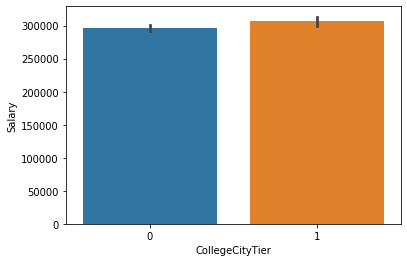

In [260]:
sns.barplot(x='CollegeCityTier',y='Salary',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

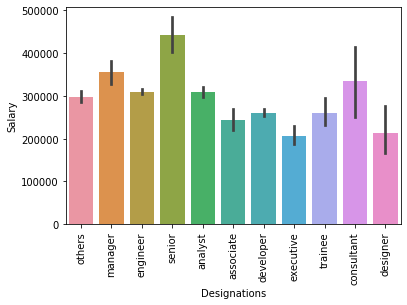

In [261]:
sns.barplot(x='Designations',y='Salary',data=train)
plt.xticks(rotation=90)

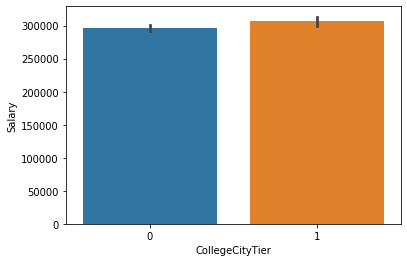

In [262]:
sns.barplot(x='CollegeCityTier',y='Salary',data=train)

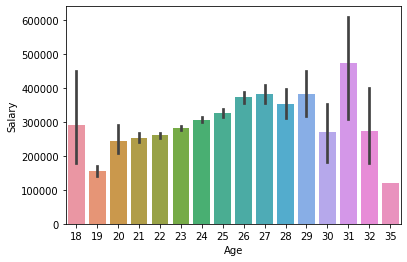

In [263]:
sns.barplot(x='Age',y='Salary',data=train)

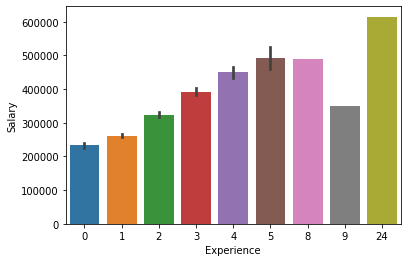

In [264]:
sns.barplot(x='Experience',y='Salary',data=train)

### Correlation Plot

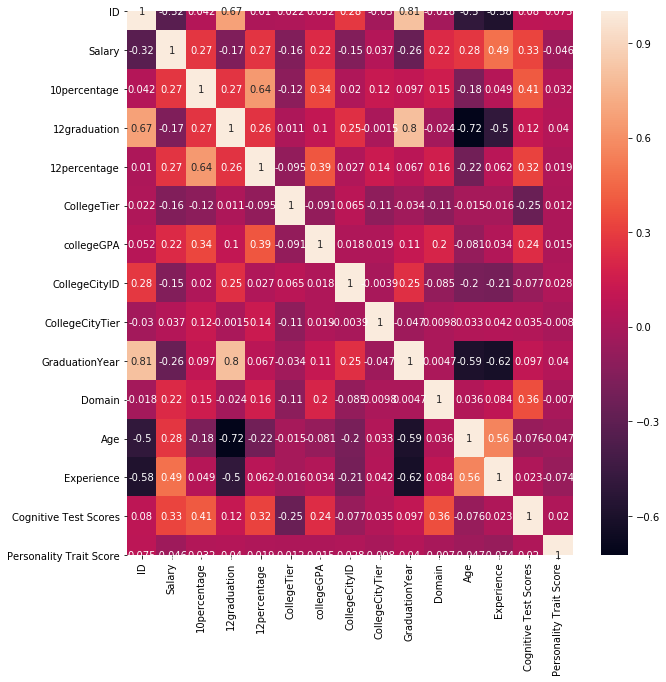

In [265]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

### Pair Plot (hist)

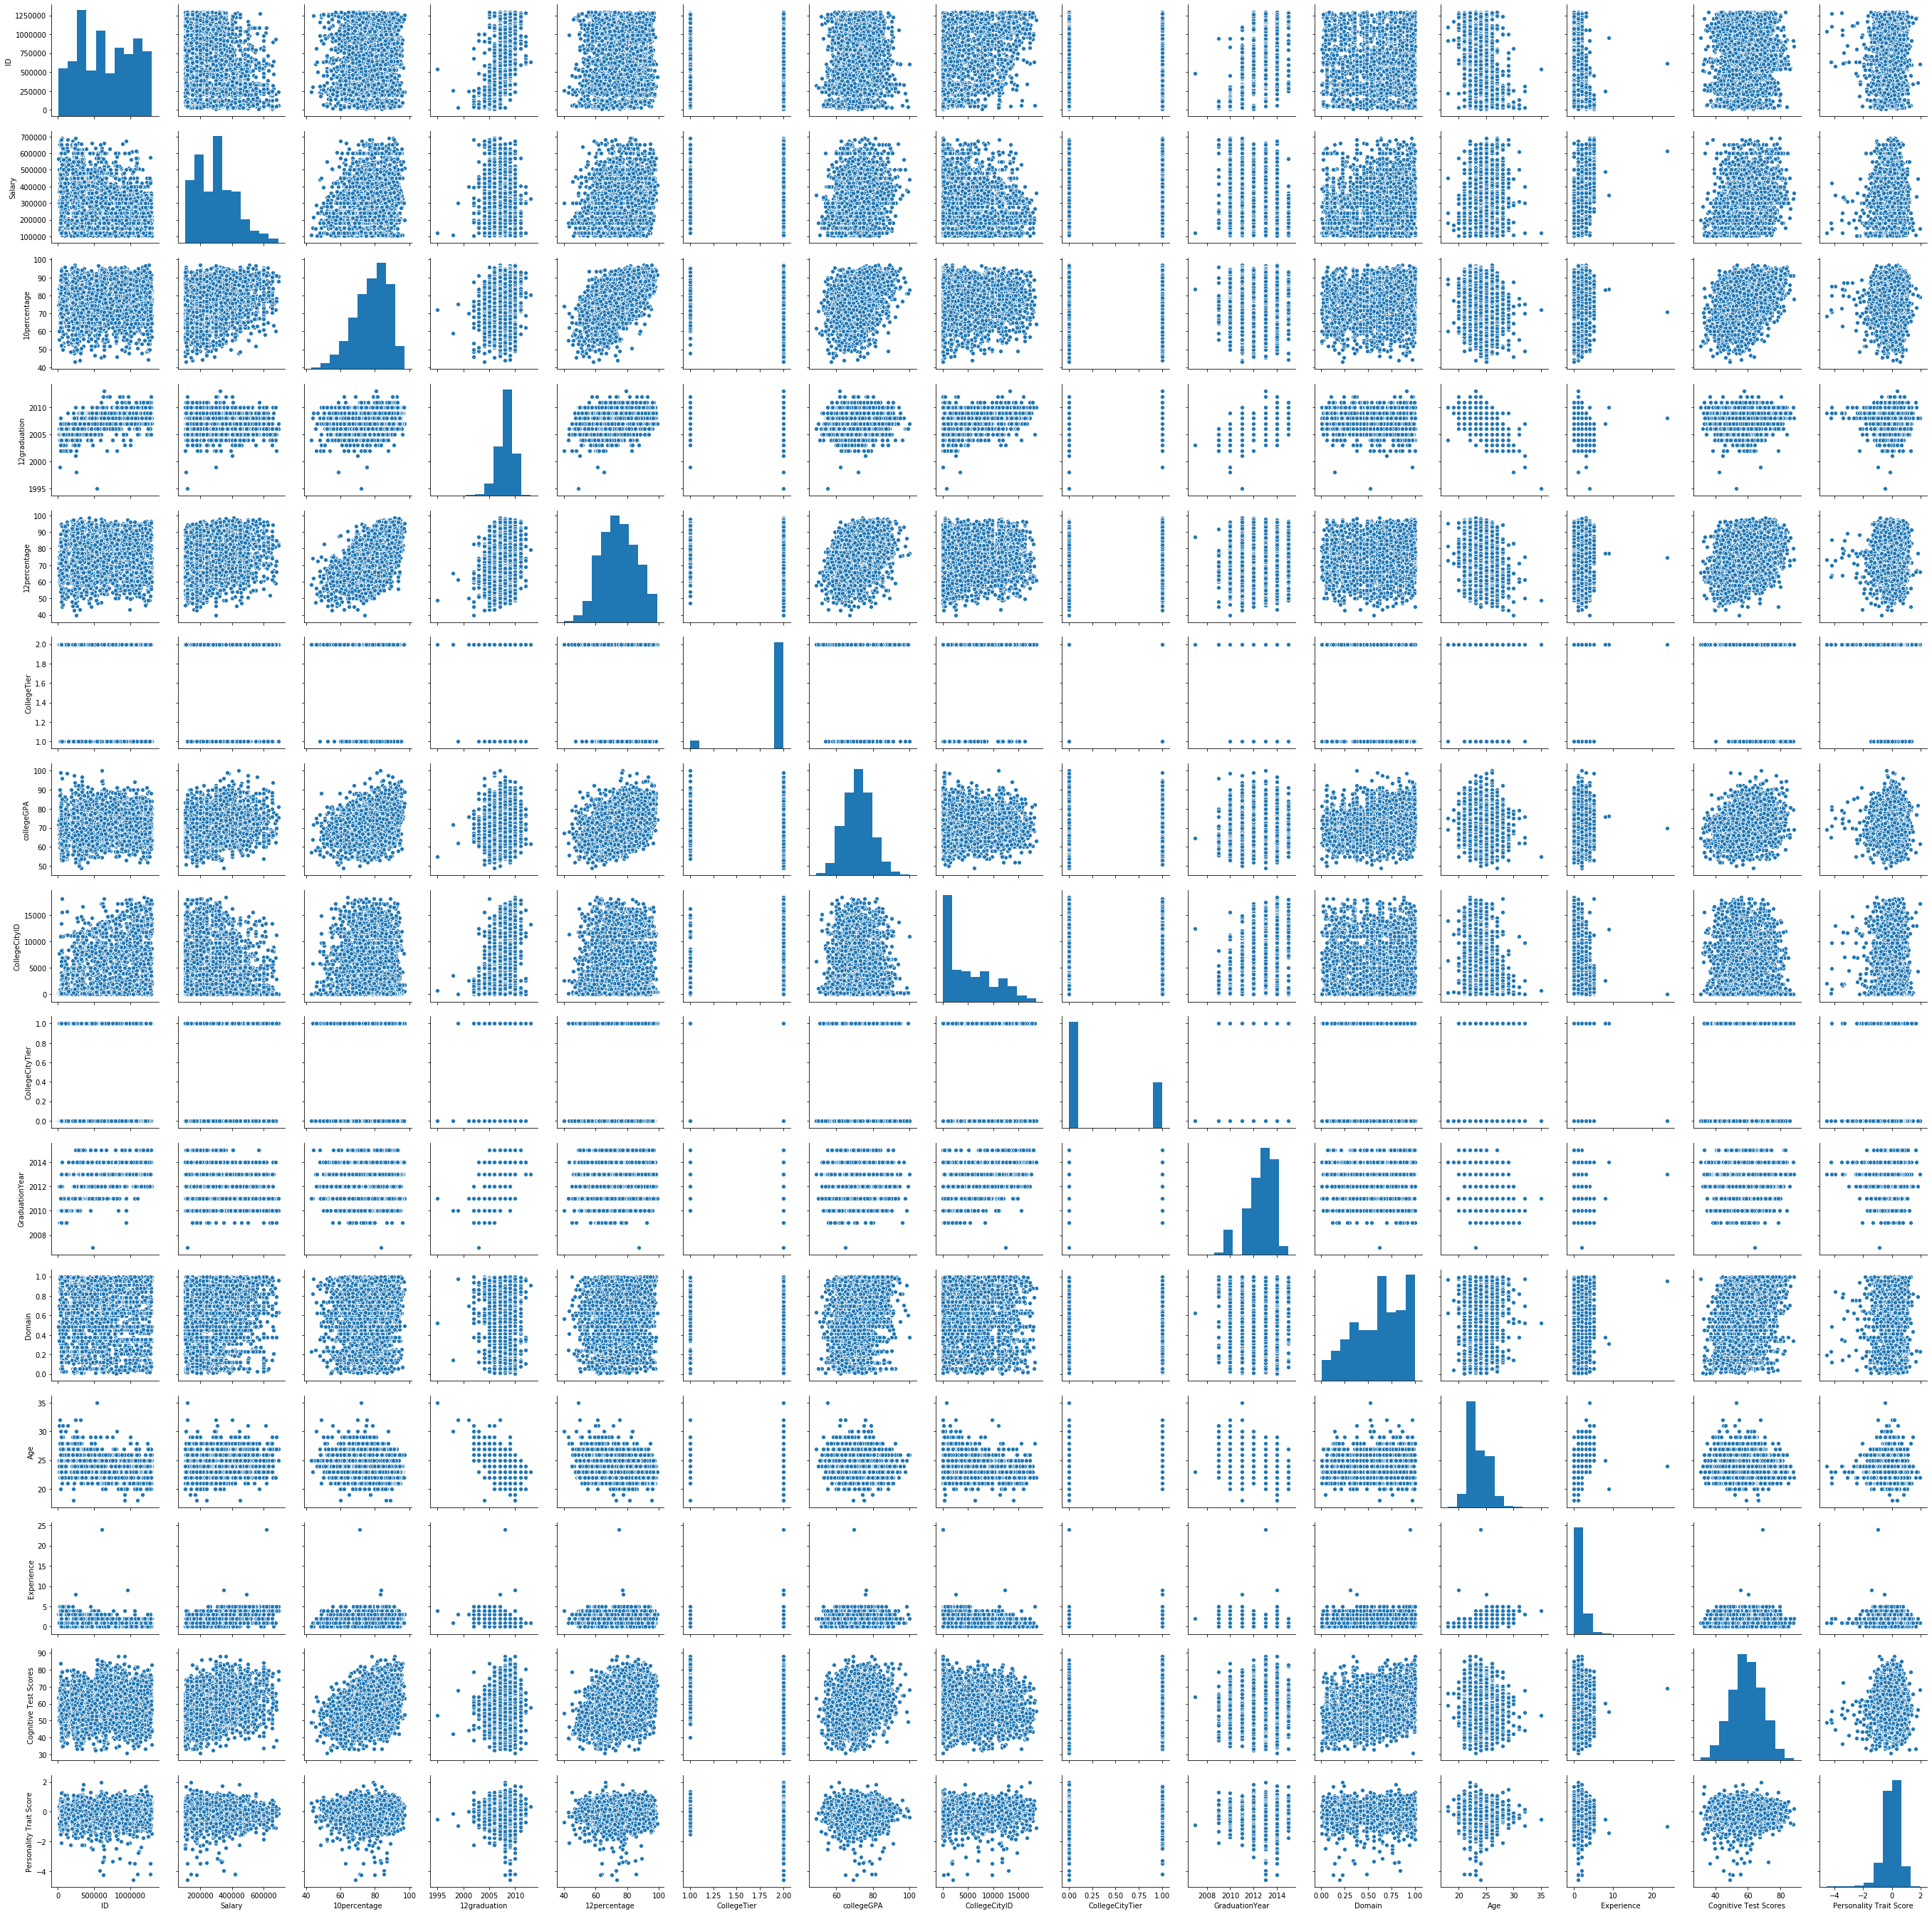

In [317]:
sns.pairplot(data = train)

### Pair Plot (Density)

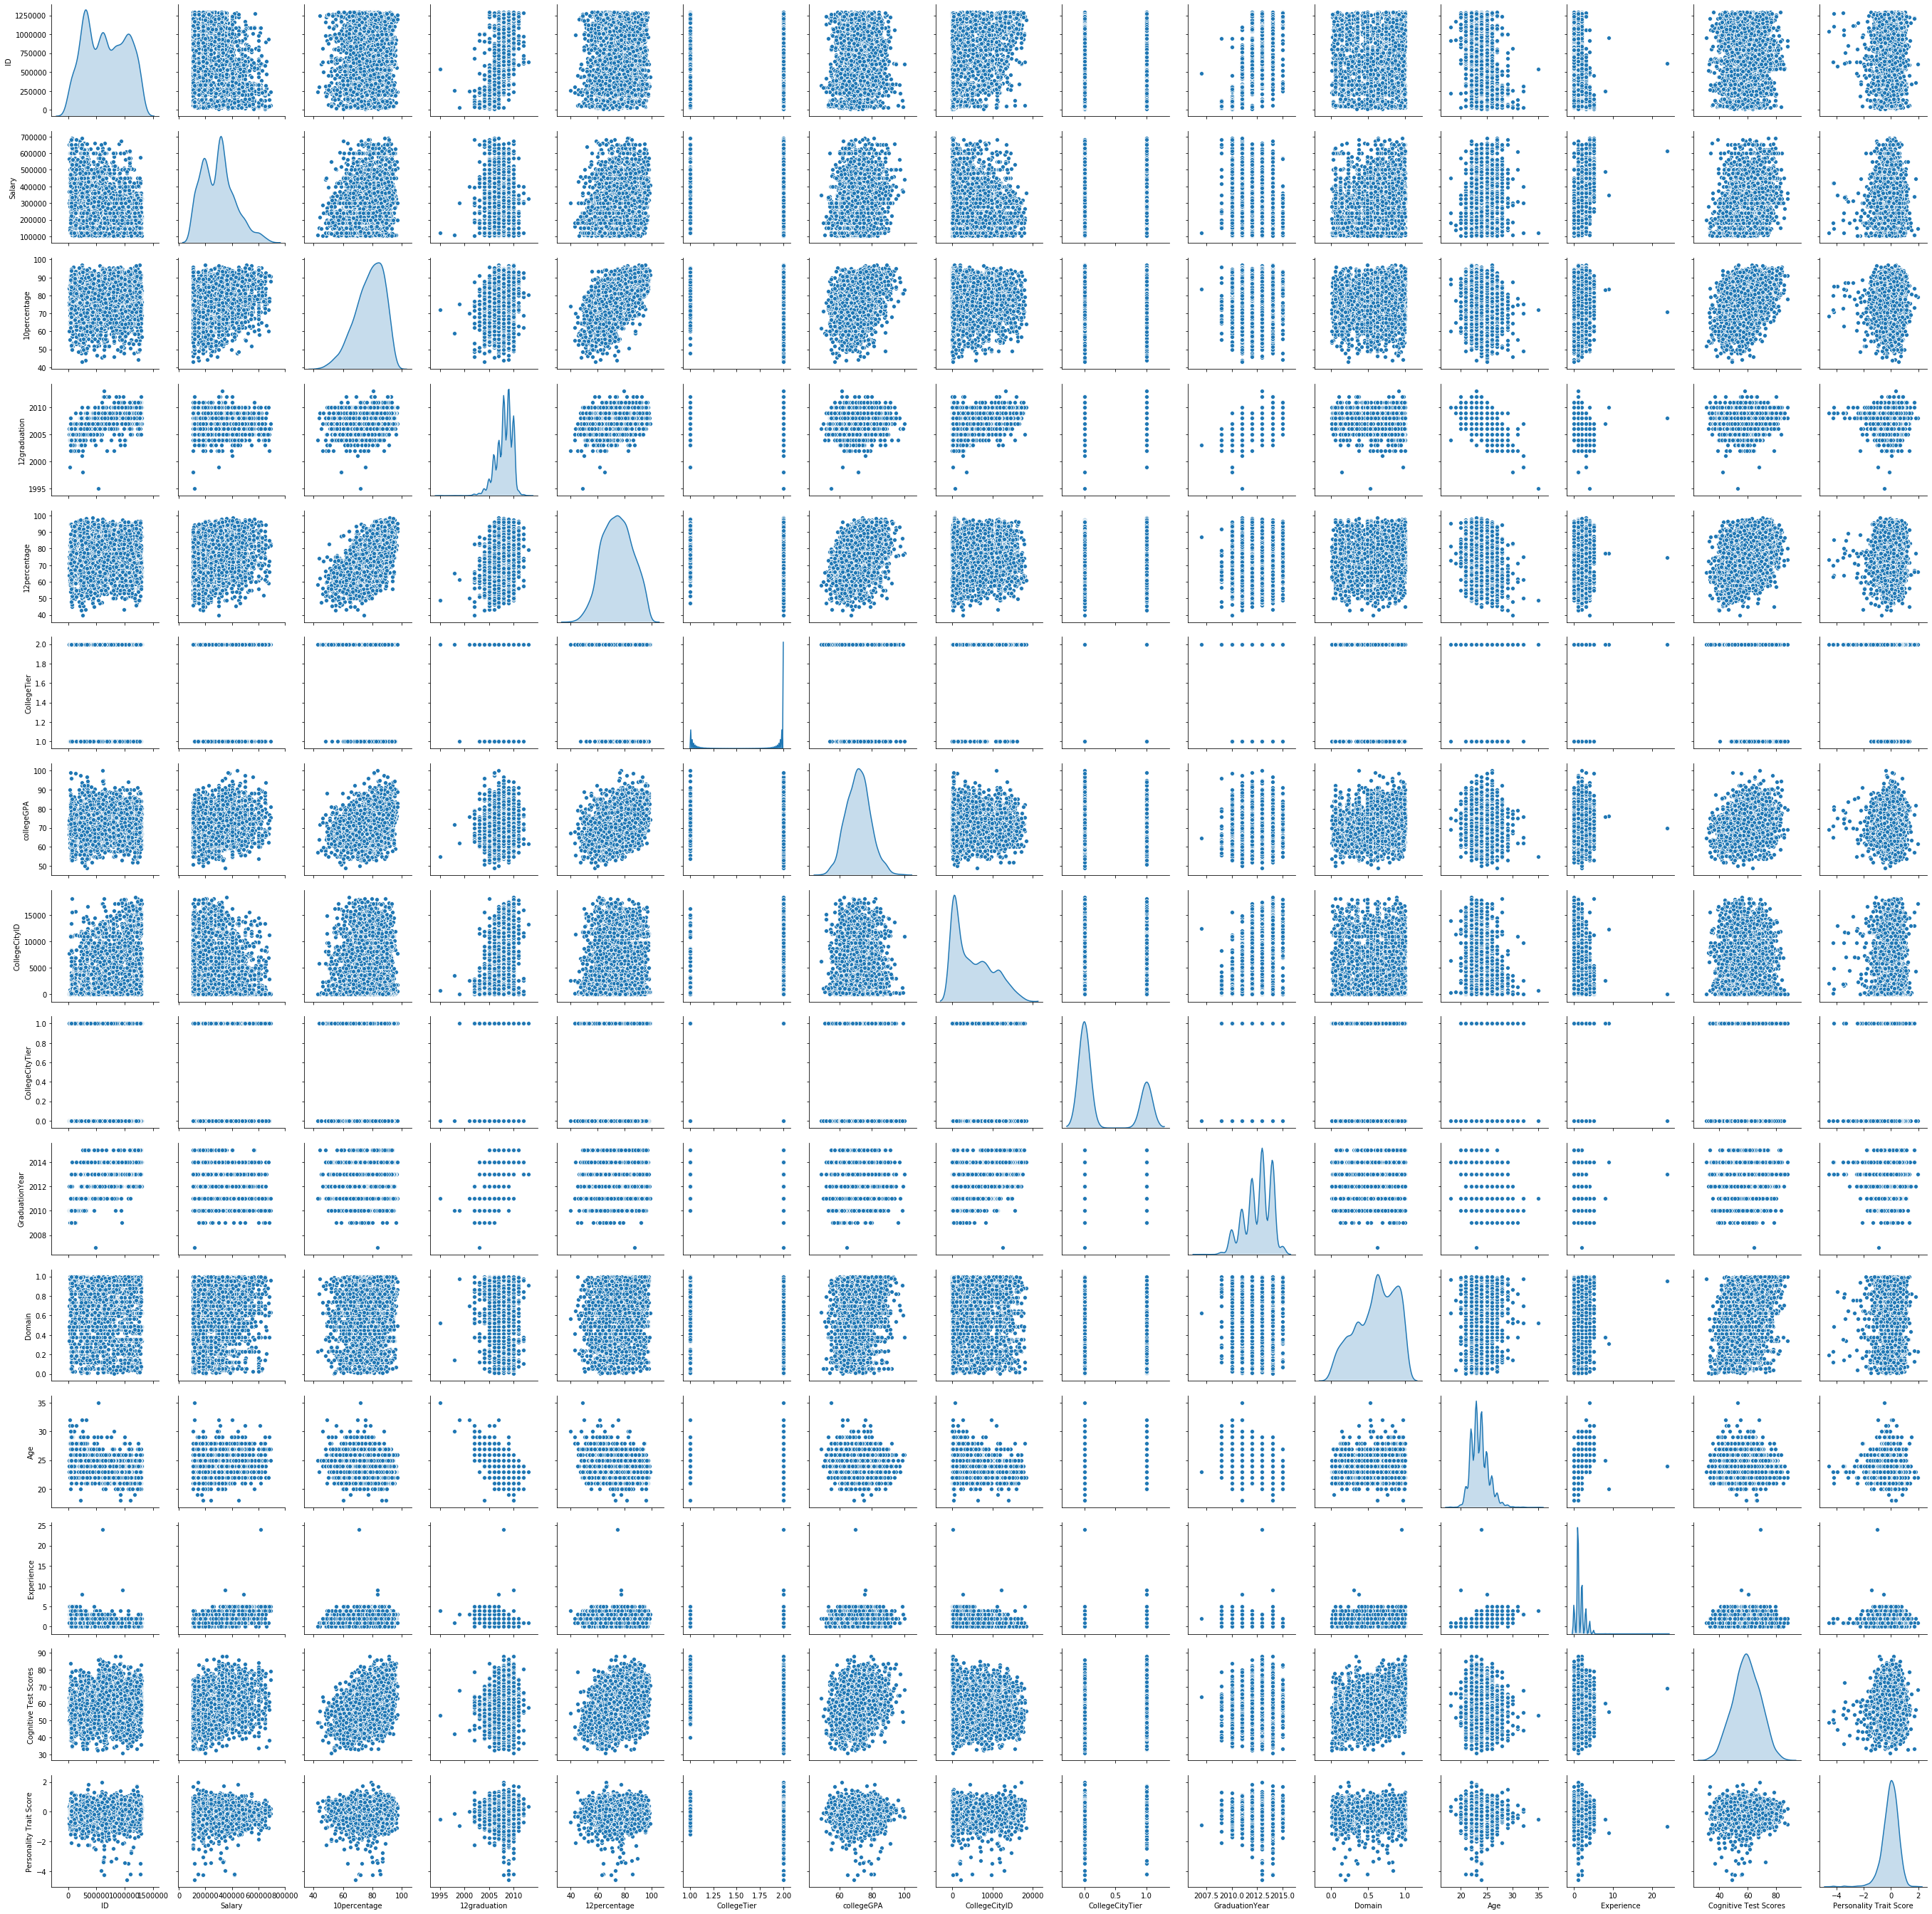

In [318]:
sns.pairplot(data = train, diag_kind='kde')

### Defining Features and Target

In [289]:
X= train[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = train['Salary']

### Train-Test Split

In [290]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

### KBest Feature Selection

In [269]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(10,'Score'))  

                 Feature       Score
4             Experience  755.685759
5  Cognitive Test Scores  345.779403
3                    Age  218.985077
6           10percentage  196.456129
7           12percentage  191.292989
0             collegeGPA  133.382060
1            CollegeTier   82.528343
2        CollegeCityTier    2.515481


### Linear Regression

In [298]:
# Create Empty Lists to append Regression scores and errors
model_names = []
train_r2_scores = []
test_r2_scores = []
mae_values = []
mse_values = []
rmse_values = []

In [299]:
lr_mdl = LinearRegression()
lr_mdl.fit(x_train,y_train) 

y_pred = lr_mdl.predict(x_test)

train_r2 = lr_mdl.score(x_train,y_train)
test_r2  = lr_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Linear Regression")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Linear Regression ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Linear Regression ***
Train R-squared:  0.4099200849245104
Test R-squared:  0.40853863187781914
MAE:  73388.83378267419
MSE:  8783743039.88168
RMSE:  93721.62525202858


### Support Vector Regressor - RBF

In [300]:
svm_mdl = svm.SVR()
svm_mdl.fit(x_train,y_train) 

y_pred = svm_mdl.predict(x_test)

train_r2 = svm_mdl.score(x_train,y_train)
test_r2  = svm_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("SVR - RBF")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** SVR - RBF ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** SVR - RBF ***
Train R-squared:  -2.4979058875329585e-05
Test R-squared:  -0.0005903084869827159
MAE:  96305.60075353367
MSE:  14859682528.124182
RMSE:  121900.29748989205


### Random Forest Regressor

In [301]:
rf_mdl = RandomForestRegressor(n_estimators = 1500,max_features='sqrt')
rf_mdl.fit(x_train,y_train) 

y_pred = rf_mdl.predict(x_test)

train_r2 = rf_mdl.score(x_train,y_train)
test_r2  = rf_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Random Forest Regressor")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Random Forest Regressor ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Random Forest Regressor ***
Train R-squared:  0.9129856299994008
Test R-squared:  0.38962847417688895
MAE:  74310.75007555154
MSE:  9064576201.67543
RMSE:  95208.06794424215


### Support Vector Regressor - Linear

In [302]:
svr_mdl = svm.LinearSVR()
svr_mdl.fit(x_train,y_train) 

y_pred = svr_mdl.predict(x_test)

train_r2 = svr_mdl.score(x_train,y_train)
test_r2  = svr_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Linear SVR")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Linear SVR ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Linear SVR ***
Train R-squared:  -0.10546183968963962
Test R-squared:  -0.018642616123302203
MAE:  97257.30732439562
MSE:  15127775830.74808
RMSE:  122995.02360155909


### Lasso

In [303]:
lasso_mdl = linear_model.Lasso(alpha=0.05, selection="random", random_state=0)
lasso_mdl.fit(x_train,y_train) 

y_pred = lasso_mdl.predict(x_test)

train_r2 = lasso_mdl.score(x_train,y_train)
test_r2  = lasso_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Lasso")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Lasso ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Lasso ***
Train R-squared:  0.40780461639738086
Test R-squared:  0.40412973527677365
MAE:  73659.43245289108
MSE:  8849219192.543928
RMSE:  94070.28857478821


C:\Users\Sravan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Ridge

In [304]:
from sklearn.linear_model import LinearRegression, Ridge

ridge_mdl = linear_model.Ridge(alpha=0, random_state=0)
ridge_mdl.fit(x_train,y_train) 

y_pred = ridge_mdl.predict(x_test)

train_r2 = ridge_mdl.score(x_train,y_train)
test_r2  = ridge_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Ridge")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Ridge ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Ridge ***
Train R-squared:  0.3576070051418794
Test R-squared:  0.37903601839429635
MAE:  75009.97552130553
MSE:  9221883871.745241
RMSE:  96030.6402756185


### Logistic Regression Linear model fit

In [305]:
log_mdl = linear_model.LogisticRegression()
log_mdl.fit(x_train,y_train) 

y_pred = log_mdl.predict(x_test)

train_r2 = log_mdl.score(x_train,y_train)
test_r2  = log_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Logistic Regression")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Logistic Regression ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Logistic Regression ***
Train R-squared:  0.2052877138413686
Test R-squared:  0.0770625566636446
MAE:  93591.11514052584
MSE:  16400100634.63282
RMSE:  128062.87766028382


### Decision Tree Regressor

In [306]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)

train_r2 = dt.score(x_train,y_train)
test_r2  = dt.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Decision Tree Regressor")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Decision Tree Regressor ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Decision Tree Regressor ***
Train R-squared:  1.0
Test R-squared:  -0.2652275435204179
MAE:  106025.38531278331
MSE:  18789787851.314598
RMSE:  137075.84707494825


### AdaBoosting Regressor

In [307]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)
abr.fit(x_train,y_train)
y_pred= abr.predict(x_test)

train_r2 = abr.score(x_train,y_train)
test_r2  = abr.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("AdaBoost Regressor")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** AdaBoost Regressor ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** AdaBoost Regressor ***
Train R-squared:  0.25199024485781896
Test R-squared:  0.21264920953599054
MAE:  86724.95625620769
MSE:  11692880378.038376
RMSE:  108133.62279161082


### Gradient Boosting Regressor

In [308]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)
gbr.fit(x_train,y_train)
y_pred= gbr.predict(x_test)

train_r2 = gbr.score(x_train,y_train)
test_r2  = gbr.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("GradBoost Regressor")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** GradBoost Regressor ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** GradBoost Regressor ***
Train R-squared:  0.5038995427122172
Test R-squared:  0.40373183336235435
MAE:  73178.14353897054
MSE:  8855128400.413975
RMSE:  94101.69180420709


### K Nearest Neighbors Regressor

In [309]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [310]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [311]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(X,Y) 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)
neigh.fit(x_train,y_train)
y_pred= neigh.predict(x_test)

train_r2 = neigh.score(x_train,y_train)
test_r2  = neigh.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("KNN Regressor")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** KNN Regressor ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** KNN Regressor ***
Train R-squared:  0.33682057639965934
Test R-squared:  0.17543556323738885
MAE:  86093.28095094189
MSE:  12245537109.79036
RMSE:  110659.55498641028


### Linear Regression - Ploynomial Features

Best degree 2 with RMSE 93721.62525203617


Text(0, 0.5, 'RMSE')

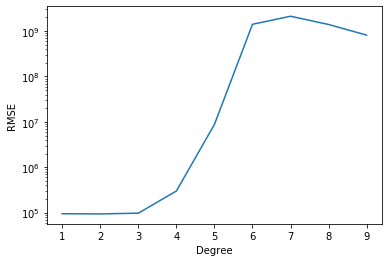

In [312]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly= poly_features.fit_transform(X) 
    x_poly_train, x_poly_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.30,random_state=1)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [313]:
poly = PolynomialFeatures(degree=2)
X_poly= poly.fit_transform(X) 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.30,random_state=1)
lin2 = LinearRegression() 
lin2.fit(x_train,y_train) 

y_pred = lin2.predict(x_test)

train_r2 = lin2.score(x_train,y_train)
test_r2  = lin2.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Linear Regression - Polynomial Features")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Linear Regression - Polynomial Features ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Linear Regression - Polynomial Features ***
Train R-squared:  0.4099200849245104
Test R-squared:  0.40853863187781914
MAE:  73388.83378267419
MSE:  8783743039.88168
RMSE:  93721.62525202858


### Comapare Scores and Errors of different Regression Models

In [314]:
reg_df = pd.DataFrame(list(zip(train_r2_scores, test_r2_scores, mae_values, mse_values, rmse_values)), 
                      index = model_names, 
                      columns =['Train_R2', 'Test_R2', 'MAE', 'MSE', 'RMSE']) 
reg_df

Train_R2   Test_R2            MAE  \
Linear Regression                        0.409920  0.408539   73388.833783   
SVR - RBF                               -0.000025 -0.000590   96305.600754   
Random Forest Regressor                  0.912986  0.389628   74310.750076   
Linear SVR                              -0.105462 -0.018643   97257.307324   
Lasso                                    0.407805  0.404130   73659.432453   
Ridge                                    0.357607  0.379036   75009.975521   
Logistic Regression                      0.205288  0.077063   93591.115141   
Decision Tree Regressor                  1.000000 -0.265228  106025.385313   
AdaBoost Regressor                       0.251990  0.212649   86724.956256   
GradBoost Regressor                      0.503900  0.403732   73178.143539   
KNN Regressor                            0.336821  0.175436   86093.280951   
Linear Regression - Polynomial Features  0.409920  0.408539   73388.833783   

                                                  MSE           RMSE  
Linear Regression                        8.783743e+09   93721.625252  
SVR - RBF                                1.485968e+10  121900.297490  
Random Forest Regressor                  9.064576e+09   95208.067944  
Linear SVR                               1.512778e+10  122995.023602  
Lasso                                    8.849219e+09   94070.288575  
Ridge                                    9.221884e+09   96030.640276  
Logistic Regression                      1.640010e+10  128062.877660  
Decision Tree Regressor                  1.878979e+10  137075.847075  
AdaBoost Regressor                       1.169288e+10  108133.622792  
GradBoost Regressor                      8.855128e+09   94101.691804  
KNN Regressor                            1.224554e+10  110659.554986  
Linear Regression - Polynomial Features  8.783743e+09   93721.625252

## Conclusion

### From the above comparison chart, its evident that Linear Regression - Plynomial with Degree 2 has gives best results comapred to other regression Models i.e. train and test r2_scores around 0.40 and RMSE with 93721

## Visualization of Best Fit

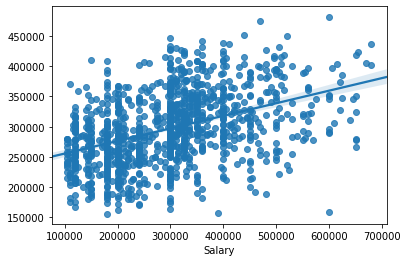

In [147]:
sns.regplot(x=y_test,y=y_pred) ## Showing the relationship between train and test data according to Linear Regression as it was the best Regression model

### Since we see that, we cant further increase efficiency of regression models, let's deal this as classification problem

### Let's try to modify this as a classification problem by creating 3 bins from salary columns ##

In [148]:
def sal(x):
    if x > 1000000:
        return 'High packg'
    elif x > 500000 and x <= 1000000:
        return 'Good packg'
    elif x > 350000 and x <= 500000:
        return 'Average packg'
    else:
        return 'Low packg'

In [149]:
df = train.copy()
df.head()

ID    Salary    JobCity Gender  10percentage  12graduation  \
0   203097  420000.0  Bangalore      f         84.30          2007   
1   579905  500000.0     Indore      m         85.40          2007   
2   810601  325000.0    Chennai      f         85.00          2010   
4   343523  200000.0    Manesar      m         78.00          2008   
5  1027655  300000.0  Hyderabad      m         89.92          2010   

   12percentage                             12board  CollegeTier       Degree  \
0          95.8  board of intermediate education,ap            2  B.Tech/B.E.   
1          85.0                                cbse            2  B.Tech/B.E.   
2          68.2                                cbse            2  B.Tech/B.E.   
4          76.8                                cbse            2  B.Tech/B.E.   
5          87.0                         state board            2  B.Tech/B.E.   

   ... CollegeCityTier  GraduationYear    Domain  Age  Experience  \
0  ...               0            2011  0.635979   25           3   
1  ...               0            2012  0.960603   26           2   
2  ...               0            2014  0.450877   23           1   
4  ...               0            2012  0.124502   24           1   
5  ...               0            2014  0.622643   23           1   

   Cognitive Test Scores     10 Board     12 Board  Personality Trait Score  \
0              63.591794  State Board  State Board                 0.644560   
1              80.941599         CBSE         CBSE                 0.328220   
2              59.983428         CBSE         CBSE                 0.390060   
4              64.189578         CBSE         CBSE                -0.453574   
5              67.566737  State Board  State Board                -0.964100   

  Designations  
0       others  
1      manager  
2     engineer  
4       others  
5     engineer  

[5 rows x 23 columns]

In [150]:
df['Salary'] = df['Salary'].astype("float")

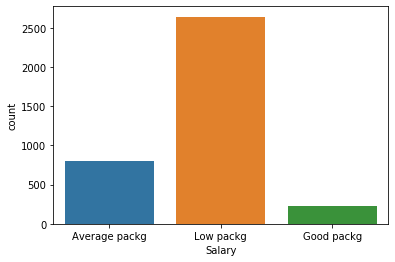

In [151]:
from sklearn.preprocessing import LabelEncoder
df['Salary'] = df['Salary'].apply(sal)
import seaborn as sns
sns.countplot(df['Salary'])

In [152]:
lc = LabelEncoder()
df['Salary'] = lc.fit_transform(df['Salary'])
df.head()

ID  Salary    JobCity Gender  10percentage  12graduation  \
0   203097       0  Bangalore      f         84.30          2007   
1   579905       0     Indore      m         85.40          2007   
2   810601       2    Chennai      f         85.00          2010   
4   343523       2    Manesar      m         78.00          2008   
5  1027655       2  Hyderabad      m         89.92          2010   

   12percentage                             12board  CollegeTier       Degree  \
0          95.8  board of intermediate education,ap            2  B.Tech/B.E.   
1          85.0                                cbse            2  B.Tech/B.E.   
2          68.2                                cbse            2  B.Tech/B.E.   
4          76.8                                cbse            2  B.Tech/B.E.   
5          87.0                         state board            2  B.Tech/B.E.   

   ... CollegeCityTier  GraduationYear    Domain  Age  Experience  \
0  ...               0            2011  0.635979   25           3   
1  ...               0            2012  0.960603   26           2   
2  ...               0            2014  0.450877   23           1   
4  ...               0            2012  0.124502   24           1   
5  ...               0            2014  0.622643   23           1   

   Cognitive Test Scores     10 Board     12 Board  Personality Trait Score  \
0              63.591794  State Board  State Board                 0.644560   
1              80.941599         CBSE         CBSE                 0.328220   
2              59.983428         CBSE         CBSE                 0.390060   
4              64.189578         CBSE         CBSE                -0.453574   
5              67.566737  State Board  State Board                -0.964100   

  Designations  
0       others  
1      manager  
2     engineer  
4       others  
5     engineer  

[5 rows x 23 columns]

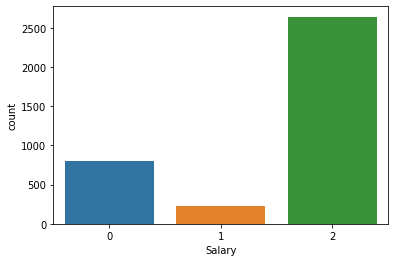

In [153]:
sns.countplot(df['Salary'])

In [319]:
classif_data_df = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage','Salary']]

### Bi-Variate Analysis (Pair plot)

C:\Users\Sravan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sravan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Sravan\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


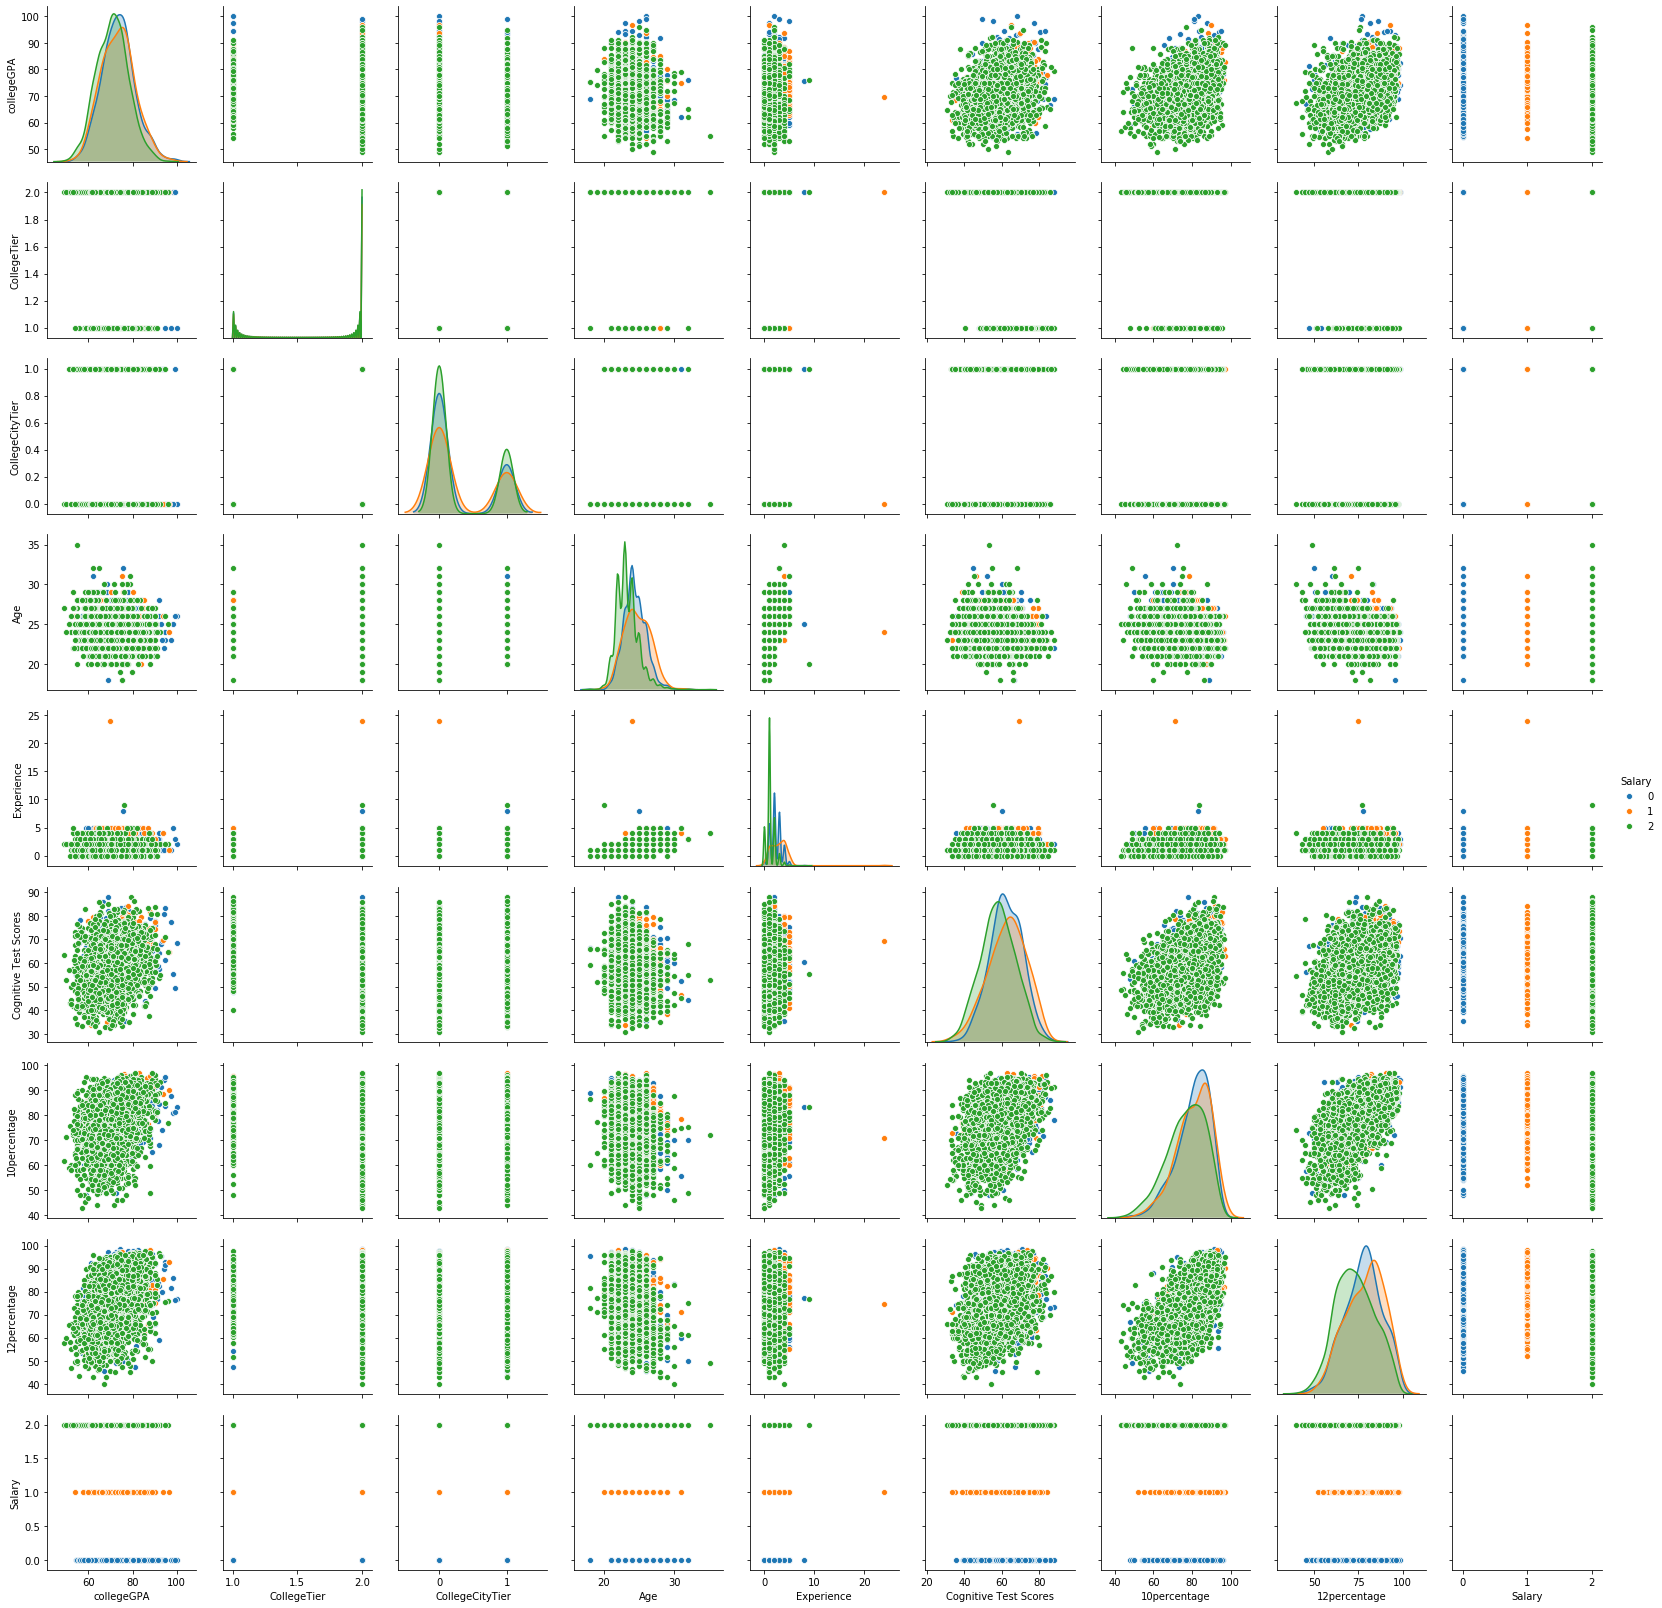

In [321]:
sns.pairplot(data=classif_data_df,  hue = 'Salary')

### Defining feature and target set

In [154]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

### Train-Test Split

In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

### K-Best Features (Featurization)

In [156]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(10,'Score'))  

                 Feature       Score
4             Experience  393.698182
3                    Age  133.547502
5  Cognitive Test Scores   71.498432
7           12percentage   48.985219
6           10percentage   39.984559
0             collegeGPA   36.752839
1            CollegeTier   20.287027
2        CollegeCityTier    0.392723


# Model Building

### Null Accuracy

In [157]:
y_test.value_counts()

2    808
0    227
1     68
Name: Salary, dtype: int64

In [158]:
# Null Accuracy
#---------------
avg_pckg  = y_test.value_counts()[0]
good_pckg = y_test.value_counts()[1]
low_pckg  = y_test.value_counts()[2]
print("Data points with Average Package    : ", avg_pckg)
print("Data points with Good Package       : ", good_pckg)
print("Data points with Low Package        : ", low_pckg)
print("---------------------NULL ACCURACY---------------------------")
print(y_test.value_counts().head(1) / len(y_test))

Data points with Average Package    :  227
Data points with Good Package       :  68
Data points with Low Package        :  808
---------------------NULL ACCURACY---------------------------
2    0.732548
Name: Salary, dtype: float64


### Logistic Regression

In [159]:
# train a Simple logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [160]:
# make class predictions for the testing set
y_pred_class = logreg.predict(x_test)

In [161]:
# calculate accuracy
accuracy = []
from sklearn import metrics
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.786038077969175


In [162]:
y_test.dtype

dtype('int64')

In [163]:
## To Build Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 91   0 136]
 [ 41   0  27]
 [ 31   1 776]]


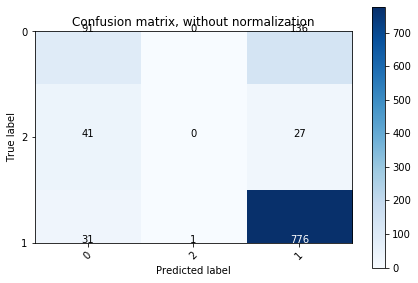

In [164]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Logistic Regression

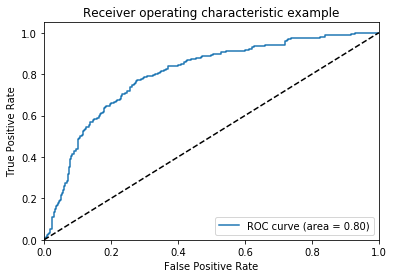

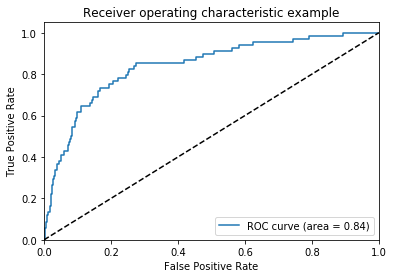

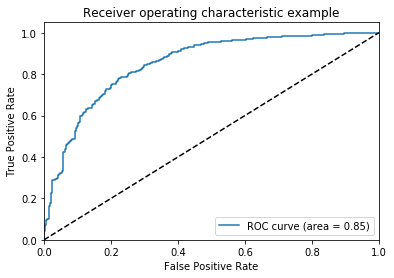

In [165]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(LogisticRegression())
y_score = clf.fit(X_train,Y_train).decision_function(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### KNN (K Nearest Neighbours)

In [166]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier()

# weights :  optional (default = ‘uniform’)
# weight function used in prediction. Possible values:
#‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# distance measures can be P=1 manhattan, P=2 Euclidian , anyother p value will map to minkowskian

In [167]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [168]:
# For every test data point, letspredict it's label based on 4 nearest neighbours in this model. T
# The majority class will be assigned to the test data point

y_pred_class = NNH.predict(x_test)

In [169]:
# calculate accuracy
from sklearn import metrics
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7162284678150499


Confusion matrix, without normalization
[[ 66   9 152]
 [ 22   3  43]
 [ 83   4 721]]


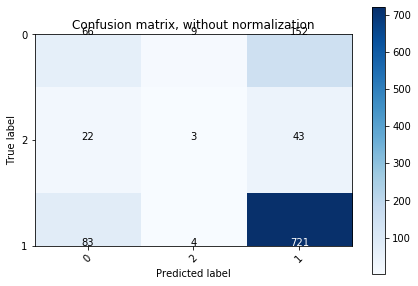

In [170]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - KNN

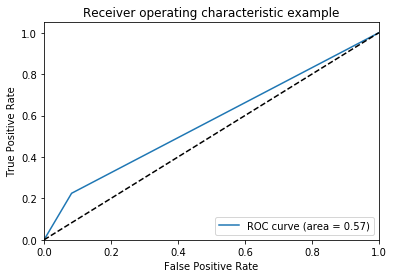

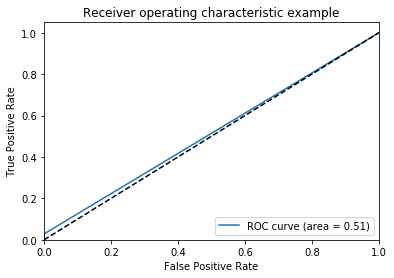

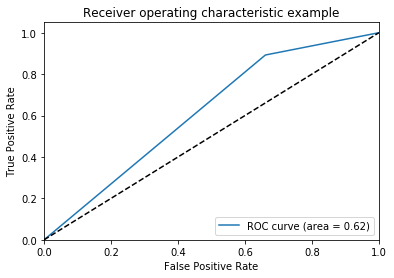

In [171]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, Y_train)
y_score = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Naive Bayes

In [172]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

In [173]:
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB(priors=None)

In [174]:
y_pred_class = clf.predict(x_test)

In [175]:
# calculate accuracy
from sklearn import metrics
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7443336355394379


Confusion matrix, without normalization
[[107  22  98]
 [ 36  13  19]
 [ 84  23 701]]


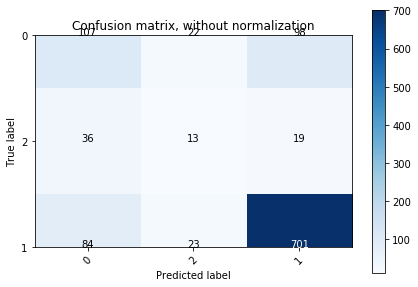

In [176]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Naive Bayes

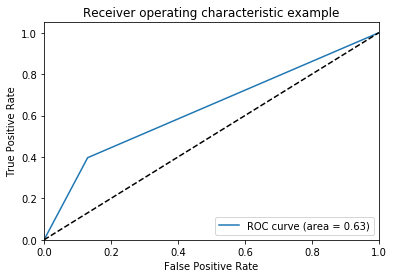

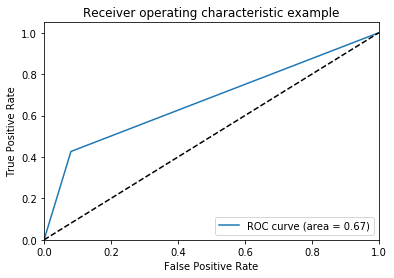

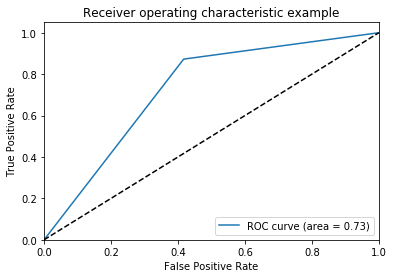

In [177]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X_train, Y_train)
y_score = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### SVM - Linear Model

In [178]:
# train a SVM model on the training set
from sklearn import svm
# To find the best C and Gamma hyper-parameters we need to use Grid-Search, here using some random/default params to start with
clf = svm.SVC(C=1, kernel='linear', gamma= 0.2)
clf.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [179]:
# make class predictions for the testing set
y_pred_class = clf.predict(x_test)

In [180]:
# calculate accuracy
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7960108794197642


Confusion matrix, without normalization
[[114   0 113]
 [ 45   0  23]
 [ 44   0 764]]


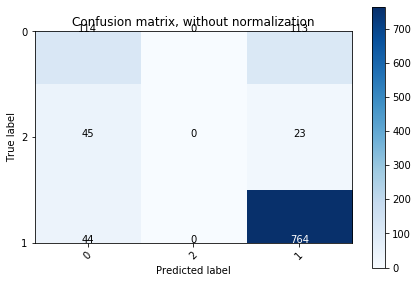

In [181]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - SVM Linear

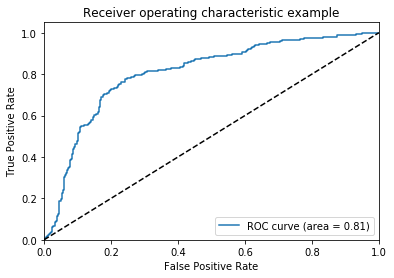

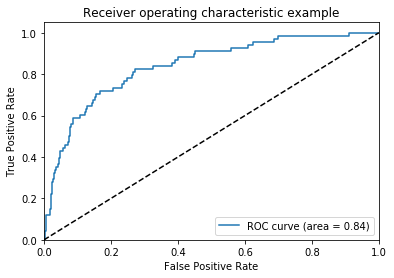

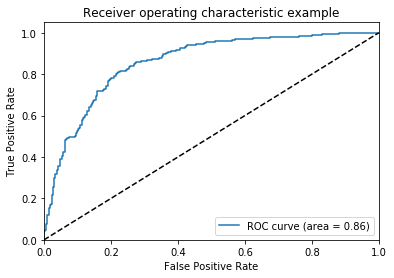

In [182]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(svm.SVC(C=1, kernel='linear', gamma= 0.2))
y_score = clf.fit(X_train,Y_train).decision_function(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### SVM - RBF Model

In [183]:
# train a SVM model on the training set
from sklearn import svm
# To find the best C and Gamma hyper-parameters we need to use Grid-Search, here using some random/default params to start with
clf = svm.SVC(C=1, kernel='rbf', gamma=0.2)
clf.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [184]:
# make class predictions for the testing set
y_pred_class = clf.predict(x_test)

In [185]:
# calculate accuracy
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.729827742520399


Confusion matrix, without normalization
[[  0   0 227]
 [  0   0  68]
 [  3   0 805]]


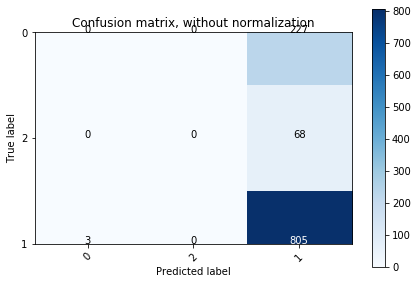

In [186]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - SVM RBF

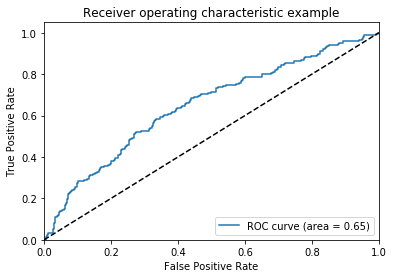

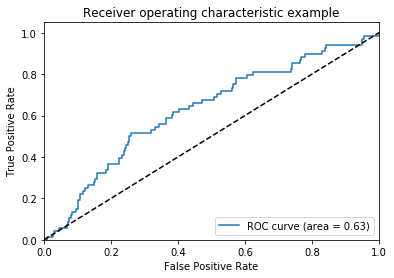

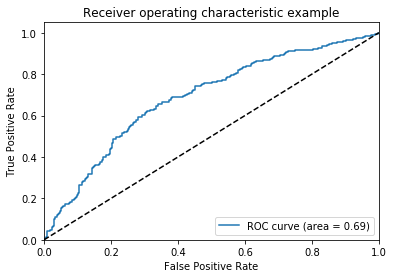

In [187]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(svm.SVC(C=1, kernel='rbf', gamma=0.2))
y_score = clf.fit(X_train,Y_train).decision_function(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Decision Trees

In [188]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [189]:
y_pred_class = dt_model.predict(x_test)

In [190]:
accuracy.append(dt_model.score(x_test, y_test))
dt_model.score(x_test, y_test)  

0.6690843155031732

Confusion matrix, without normalization
[[ 96  22 109]
 [ 27  12  29]
 [140  38 630]]


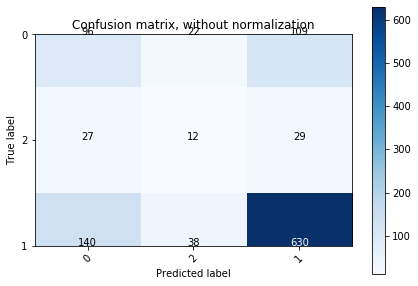

In [191]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Decision Trees

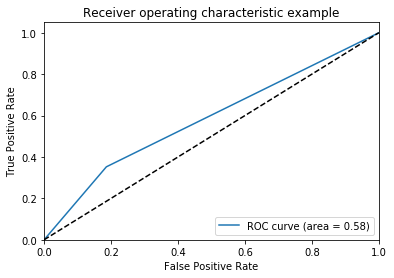

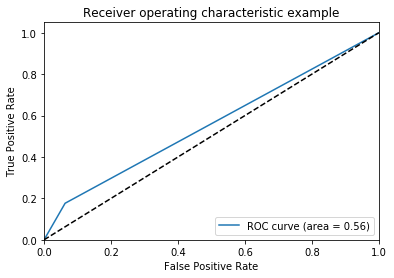

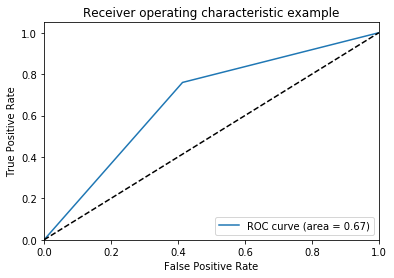

In [192]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(DecisionTreeClassifier(criterion = 'entropy' ))
clf.fit(X_train, Y_train)
y_score = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Ensemble Learning - Bagging

In [193]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=19, max_samples=.7)
#bgcl = BaggingClassifier(n_estimators=9 , max_samples=.7)
bgcl = bgcl.fit(x_train, y_train)

In [194]:
y_pred_class = bgcl.predict(x_test)
accuracy.append(bgcl.score(x_test, y_test))
bgcl.score(x_test, y_test)

0.7452402538531279

Confusion matrix, without normalization
[[ 92  12 123]
 [ 36   9  23]
 [ 79   8 721]]


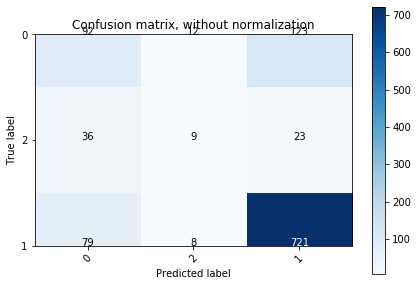

In [195]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Bagging

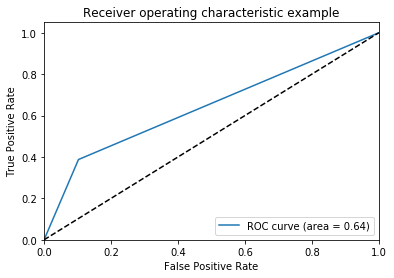

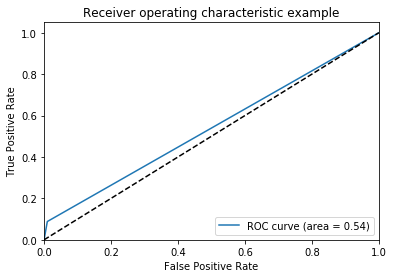

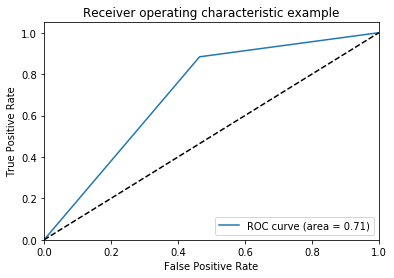

In [196]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(BaggingClassifier(base_estimator=dt_model, n_estimators=19, max_samples=.7))
clf.fit(X_train, Y_train)
y_score = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Ensemble Learning - AdaBoosting

In [197]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 50)
abcl = abcl.fit(x_train, y_train)

In [198]:
from sklearn.ensemble import AdaBoostClassifier

In [199]:
y_pred_class = abcl.predict(x_test)
accuracy.append(abcl.score(x_test, y_test))
abcl.score(x_test, y_test)

0.7787851314596554

Confusion matrix, without normalization
[[125  10  92]
 [ 39  12  17]
 [ 80   6 722]]


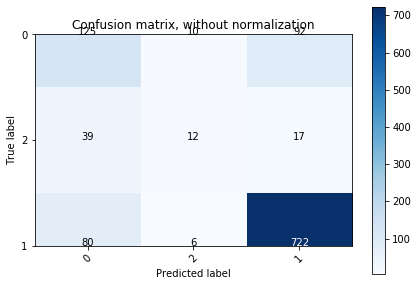

In [200]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - AdaBoost

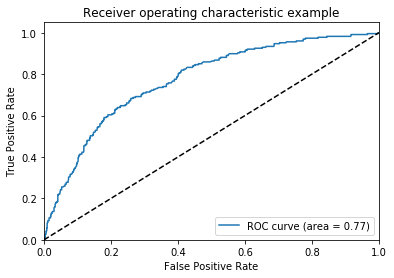

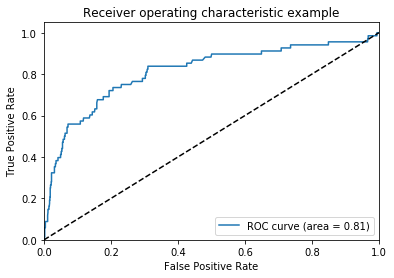

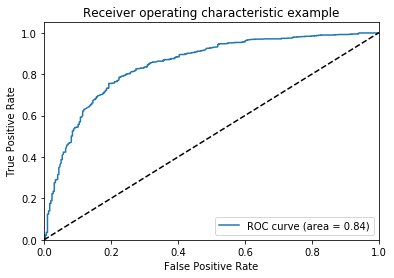

In [201]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(AdaBoostClassifier( n_estimators= 50))
y_score = clf.fit(X_train,Y_train).decision_function(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Ensemble Learning - GradientBoost

In [202]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(x_train, y_train)

In [203]:
y_pred_class = gbcl.predict(x_test)
accuracy.append(gbcl.score(x_test, y_test))
gbcl.score(x_test, y_test)

0.7787851314596554

Confusion matrix, without normalization
[[102   9 116]
 [ 34   7  27]
 [ 51   7 750]]


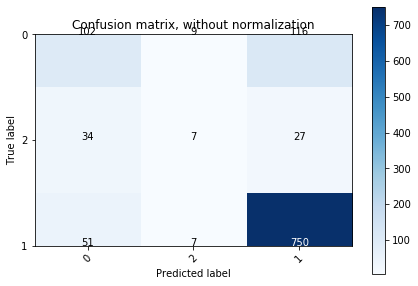

In [204]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Gradient Boosting

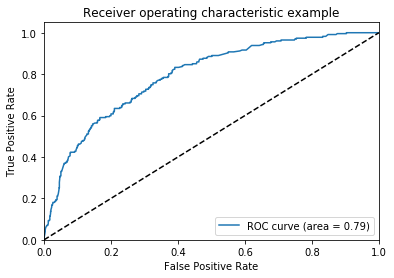

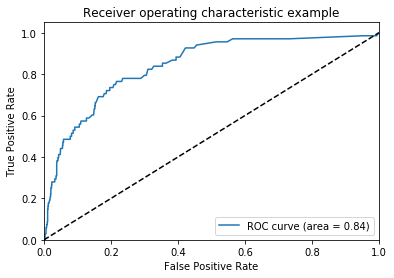

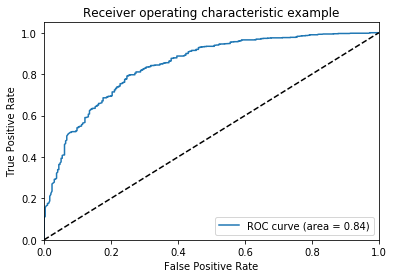

In [205]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05))
y_score = clf.fit(X_train,Y_train).decision_function(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Ensemble RandomForest Classifier

In [206]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

In [207]:
y_pred_class = rfcl.predict(x_test)
accuracy.append(rfcl.score(x_test, y_test))
rfcl.score(x_test, y_test)

0.7624660018132366

Confusion matrix, without normalization
[[106   9 112]
 [ 35   7  26]
 [ 78   2 728]]


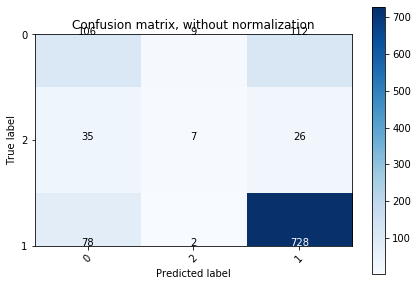

In [208]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Random Forest

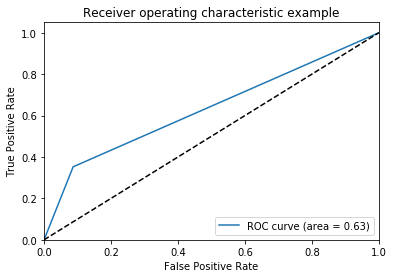

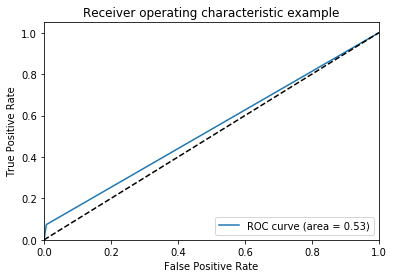

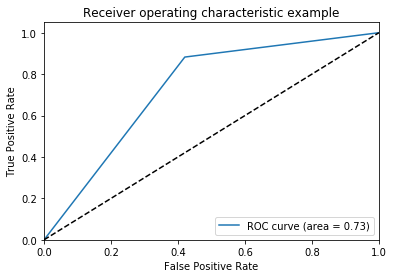

In [209]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 50))
clf.fit(X_train, Y_train)
y_score = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Accuracy Scores Comparison for all the classification models

### Logistic", "KNN", "Naive_bayes", "SVM_Linear", "SVM_RBF", "Decision_Tree", "Bagging", "AdaBoost",  "GradBoost", "Random_Forest

In [210]:
models = ["Logistic","KNN", "Naive_bayes","SVM_Linear","SVM_RBF","Decision_Tree","Bagging","AdaBoost","GradBoost","Random_Forest"]

In [211]:
def eg3_lc(keys, values):
    return { keys[i] : values[i] for i in range(len(keys)) }

In [212]:
eg3_lc(models, accuracy)

{'Logistic': 0.786038077969175,
 'KNN': 0.7162284678150499,
 'Naive_bayes': 0.7443336355394379,
 'SVM_Linear': 0.7960108794197642,
 'SVM_RBF': 0.729827742520399,
 'Decision_Tree': 0.6690843155031732,
 'Bagging': 0.7452402538531279,
 'AdaBoost': 0.7787851314596554,
 'GradBoost': 0.7787851314596554,
 'Random_Forest': 0.7624660018132366}

# K Fold Cross Validation

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_scores = cross_val_score(logreg,X,Y, cv=10)
logreg_scores

C:\Users\Iqraa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Iqraa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Iqraa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Iqraa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Iqraa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

array([0.76693767, 0.78319783, 0.74525745, 0.76693767, 0.75271739,
       0.77384196, 0.78688525, 0.78688525, 0.7704918 , 0.77595628])

In [128]:
clf = GaussianNB()
NB_scores = cross_val_score(clf,X,Y, cv=10)
NB_scores

array([0.72357724, 0.73712737, 0.70460705, 0.73712737, 0.73641304,
       0.73297003, 0.77595628, 0.7704918 , 0.71311475, 0.76775956])

In [129]:
KNNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'uniform', metric='euclidean')
KNN_scores = cross_val_score(KNNH,X,Y, cv=10)
KNN_scores

array([0.71815718, 0.7100271 , 0.71815718, 0.69918699, 0.72826087,
       0.72207084, 0.71857923, 0.74863388, 0.70218579, 0.7431694 ])

In [130]:
from sklearn import svm
svmlnr = svm.SVC(C=1, kernel='linear',gamma=0.2)
svmlnr_scores = cross_val_score(svmlnr,X,Y, cv=10)
svmlnr_scores

array([0.76693767, 0.78319783, 0.73441734, 0.77506775, 0.74728261,
       0.78201635, 0.79234973, 0.80054645, 0.77595628, 0.78961749])

In [131]:
svmrbf = svm.SVC(C=1, kernel='rbf',gamma=0.2)
svmrbf_scores = cross_val_score(svmrbf, X,Y, cv=10)
svmrbf_scores

array([0.71815718, 0.71544715, 0.71273713, 0.7100271 , 0.71467391,
       0.71934605, 0.71584699, 0.72677596, 0.72404372, 0.72131148])

In [132]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_scores = cross_val_score(dt_model,X,Y, cv=10)
dt_scores

array([0.64498645, 0.65311653, 0.65311653, 0.68834688, 0.69836957,
       0.69754768, 0.71038251, 0.68306011, 0.68852459, 0.68306011])

In [133]:
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=19, max_samples=.7)
bgcl_scores = cross_val_score(bgcl,X,Y, cv=10)
bgcl_scores

array([0.74796748, 0.79132791, 0.70460705, 0.7398374 , 0.75271739,
       0.7493188 , 0.76502732, 0.7704918 , 0.7295082 , 0.77595628])

In [134]:
abcl = AdaBoostClassifier( n_estimators= 50)
abcl_scores = cross_val_score(abcl,X,Y, cv=10)
abcl_scores

array([0.79132791, 0.75880759, 0.73441734, 0.78319783, 0.77717391,
       0.76839237, 0.7704918 , 0.76775956, 0.7704918 , 0.80054645])

In [135]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl_scores = cross_val_score(gbcl,X,Y, cv=10)
gbcl_scores

array([0.79132791, 0.75609756, 0.75609756, 0.78861789, 0.76630435,
       0.76566757, 0.77595628, 0.77595628, 0.77322404, 0.78142077])

In [136]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl_scores = cross_val_score(rfcl,X,Y, cv=10)
rfcl_scores

array([0.77506775, 0.77506775, 0.71815718, 0.75609756, 0.76086957,
       0.74659401, 0.77322404, 0.75409836, 0.7431694 , 0.7704918 ])

In [137]:
cross_val_scores_df = pd.DataFrame(np.hstack((logreg_scores,NB_scores,KNN_scores,svmlnr_scores,svmrbf_scores,dt_scores,bgcl_scores,abcl_scores,gbcl_scores,rfcl_scores)))

In [138]:
cross_val_scores_df['Method'] = ["Mthod"]*100
cross_val_scores_df.columns = ["Scores","Method"]
for i in range(100):
    if i < 10:
        cross_val_scores_df.loc[i,'Method'] = 'Lgt_Regrsn'
    elif (i >= 10) and (i < 20):
        cross_val_scores_df.loc[i,'Method'] = 'Naive_Bayes'
    elif (i >= 20) and (i < 30):
        cross_val_scores_df.loc[i,'Method'] = 'KNN'
    elif (i >= 30) and (i < 40):
        cross_val_scores_df.loc[i,'Method'] = 'SVM_Linear'
    elif (i >= 40) and (i < 50):
        cross_val_scores_df.loc[i,'Method'] = 'SVM_RBF'
    elif (i >= 50) and (i < 60):
        cross_val_scores_df.loc[i,'Method'] = 'Decision_Tree'
    elif (i >= 60) and (i < 70):
        cross_val_scores_df.loc[i,'Method'] = 'Bagging'
    elif (i >= 70) and (i < 80):
        cross_val_scores_df.loc[i,'Method'] = 'Ada_Boost'
    elif (i >= 80) and (i < 90):
        cross_val_scores_df.loc[i,'Method'] = 'Grad_Boost'
    elif (i >= 90) and (i < 100):\
        cross_val_scores_df.loc[i,'Method'] = 'Random_Forest'


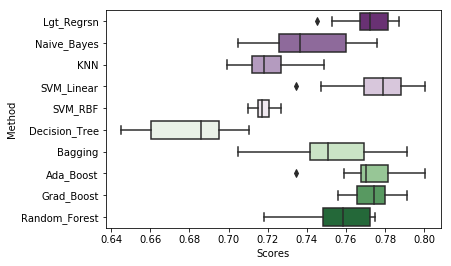

In [139]:
sns.boxplot(x="Scores", y="Method", data=cross_val_scores_df, palette="PRGn")

# Conclusion

### Apart from Ensemble Method, Logistic and SVM Linear Produced decent accuracy in 10 fold Cross Validation
### Considering Ensemble, AdaBoost and Gradient Boost showed High Accuracy Scores
### Model with the Least accuracy score is Decision tree
### Gradient Boost, SVM RBF and Ada Boost are having lesser variance with Good Accuracy Score


# We chose Gradient Boosting as final model because of,
### 1. Good Accuracy Range
### 2. No visible outliers
### 3. No drastic shift of Median
### 4. Less Variance

## Bootsrap Range Estimate for Gradient Boosting

In [213]:
data = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage','Salary']]

In [218]:
n_iterations = 100                # Number of bootstrap samples to create
n_size = int(len(data) * 0.70)   # picking only 70 % of the given data in every bootstrap sample
print(round(n_size*0.7))

1800


In [219]:
values =  data.values

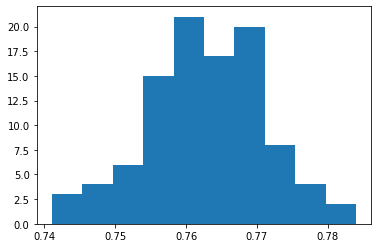

95.0 confidence interval 74.5% and 77.8%


In [220]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy
stats1 = list()
for i in range(n_iterations):
      
    train = resample(values, n_samples=n_size)
    test = numpy.array([x for x in values if x.tolist() not in train.tolist()])

    model = GradientBoostingClassifier()
    model.fit(train[:,:-1], train[:,-1])

    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)    
    stats1.append(score)
    
    
from matplotlib import pyplot
pyplot.hist(stats1)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats1, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats1, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Conclusion:

## With 95% of confidence interval, we see that "Gradient Boosting" produced better accuracy range of 74.5-77.8% with this implementation.